# Question 1 (SOM)

### Import libraries

In [81]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

## SOM Class implementation

In [128]:
class SOM:

  def __init__(self, input_size, output_size, neighborhood_indices,
               learning_rate=0.5, max_epochs=100):
    self.input_size = input_size
    self.output_size = output_size
    self.weights = self.create_random_weights()
    self.neighborhood_indices = neighborhood_indices
    self.learning_rate = learning_rate
    self.max_epochs = max_epochs

  def create_random_weights(self):
    weights = []
    for _ in range(self.input_size):
      random_weights = np.random.normal(0.5, 0.2, self.output_size)
      weights.append(random_weights)
    weights = np.array(weights)
    return weights

  def plot_output_neuron_weights(self, index):
    weight = self.weights.T[index]
    reshaped_weight = weight.reshape(28, 28)
    plt.title('Neuron {} weight matrix'.format(index))
    plt.imshow(reshaped_weight, cmap='gray')
    plt.show()

  def train(self, x_train):
    epoch = 0
    while epoch < self.max_epochs:
      for data in x_train:
        data = data.flatten()
        distances = ((self.weights.T - data) ** 2).sum(axis=1)
        min_index = np.argmin(distances)
        to_be_update_indices = [min_index]
        for offset in self.neighborhood_indices:
          new_index = min_index + offset
          if new_index >=0 and new_index < self.output_size:
            to_be_update_indices.append(new_index)
        for j in to_be_update_indices:
            self.weights.T[j] += (self.learning_rate * (data - self.weights.T[j]))
        self.learning_rate *= 0.9999
      epoch += 1
      print(f"Epoch: {epoch}")
    
  def test(self, x_test, y_test):
    real_node_labels = [{digit:0 for digit in range(10)} for _ in range(self.output_size)]
    data_clusters = [list() for _ in range(self.output_size)]
    winner_nodes = set()

    for index, data in enumerate(x_test):
      data = data.flatten()
      label = y_test[index]
      distances = ((self.weights.T - data) ** 2).sum(axis=1)
      min_index = np.argmin(distances)
      winner_nodes.add(min_index)
      real_node_labels[min_index][label] += 1
      data_clusters[min_index].append(data)

    print(f"Winner nodes count: {len(winner_nodes)}")
    for node in winner_nodes:
      print(f"Node number: {node}")
      print(f"Correct labels count in node: {real_node_labels[node]}")
      self.plot_output_neuron_weights(node)

## Load data from keras 

In [123]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_random_set = set()
train_random_indices = list()
while len(train_random_indices) != 2000:
  random_index = randrange(x_train.shape[0])
  if random_index not in train_random_set:
    train_random_set.add(random_index)
    train_random_indices.append(random_index)
x_train = x_train[train_random_indices]
y_train = y_train[train_random_indices]

test_random_set = set()
test_random_indices = list()
while len(test_random_indices) != 1000:
  random_index = randrange(x_test.shape[0])
  if random_index not in test_random_set:
    test_random_set.add(random_index)
    test_random_indices.append(random_index)
x_test = x_test[test_random_indices]
y_test = y_test[test_random_indices]

### Check each class data balance

In [124]:
cnt = {}
for label in y_train:
  if label not in cnt:
    cnt[label] = 1
  else:
    cnt[label] += 1
print("Train labels:")
print(cnt)

cnt = {}
for label in y_test:
  if label not in cnt:
    cnt[label] = 1
  else:
    cnt[label] += 1
print("Test labels:")
print(cnt)

Train labels:
{0: 189, 4: 202, 8: 201, 1: 233, 2: 181, 5: 180, 3: 225, 9: 188, 7: 217, 6: 184}
Test labels:
{0: 97, 1: 114, 7: 100, 2: 111, 5: 76, 4: 98, 3: 92, 8: 91, 6: 99, 9: 122}


## Test SOM without any neighborhood

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Train time: 123.08998656272888 s
Winner nodes count: 13
Node number: 193
Correct labels count in node: {0: 2, 1: 0, 2: 5, 3: 0, 4: 35, 5: 0, 6: 21, 7: 0, 8: 0, 9: 20}


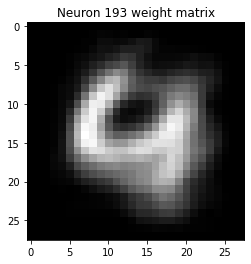

Node number: 450
Correct labels count in node: {0: 65, 1: 0, 2: 2, 3: 1, 4: 0, 5: 1, 6: 1, 7: 0, 8: 1, 9: 0}


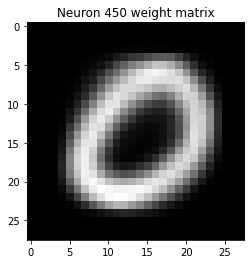

Node number: 391
Correct labels count in node: {0: 8, 1: 0, 2: 1, 3: 7, 4: 1, 5: 22, 6: 5, 7: 0, 8: 4, 9: 0}


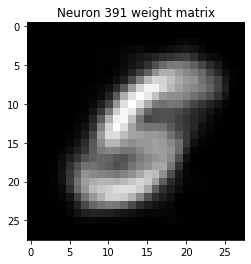

Node number: 44
Correct labels count in node: {0: 0, 1: 53, 2: 7, 3: 0, 4: 3, 5: 0, 6: 0, 7: 6, 8: 1, 9: 0}


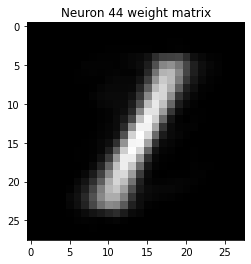

Node number: 333
Correct labels count in node: {0: 1, 1: 0, 2: 84, 3: 4, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


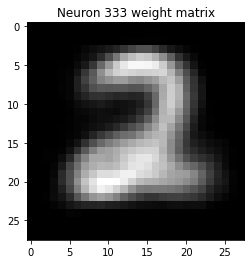

Node number: 436
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 27, 5: 0, 6: 0, 7: 32, 8: 1, 9: 55}


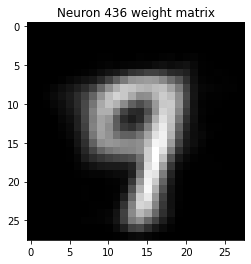

Node number: 213
Correct labels count in node: {0: 7, 1: 1, 2: 4, 3: 7, 4: 7, 5: 10, 6: 4, 7: 15, 8: 6, 9: 17}


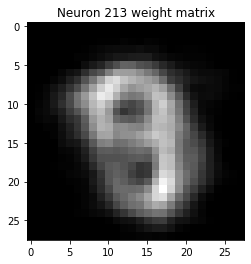

Node number: 150
Correct labels count in node: {0: 1, 1: 0, 2: 1, 3: 26, 4: 0, 5: 14, 6: 0, 7: 0, 8: 57, 9: 2}


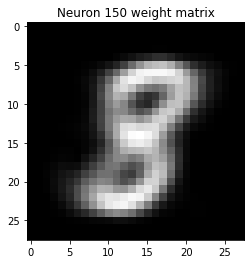

Node number: 23
Correct labels count in node: {0: 0, 1: 60, 2: 2, 3: 3, 4: 4, 5: 1, 6: 3, 7: 4, 8: 0, 9: 0}


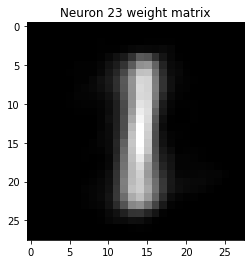

Node number: 216
Correct labels count in node: {0: 7, 1: 0, 2: 1, 3: 44, 4: 0, 5: 19, 6: 0, 7: 0, 8: 17, 9: 2}


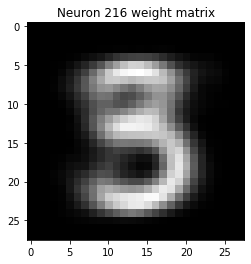

Node number: 222
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 2, 5: 5, 6: 1, 7: 3, 8: 1, 9: 1}


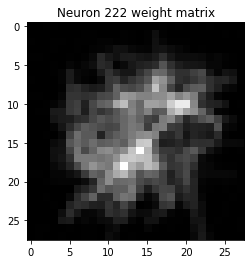

Node number: 62
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 16, 5: 3, 6: 0, 7: 40, 8: 2, 9: 25}


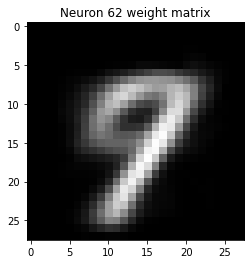

Node number: 31
Correct labels count in node: {0: 6, 1: 0, 2: 1, 3: 0, 4: 3, 5: 1, 6: 63, 7: 0, 8: 1, 9: 0}


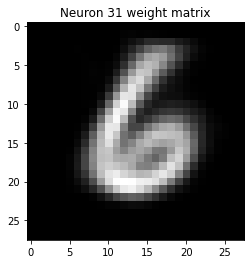

In [134]:
base_som = SOM(28*28, 625, [], max_epochs=40, learning_rate=0.1)
train_start_time = time.time()
base_som.train(x_train)
train_time = time.time() - train_start_time
print(f"Train time: {train_time} s")
base_som.test(x_test, y_test)

## Test SOM with R=2 linear neighborhood

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Train time: 126.44360041618347 s
Winner nodes count: 88
Node number: 536
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


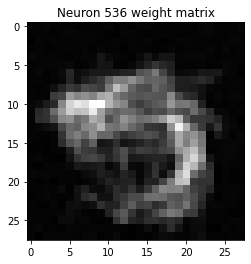

Node number: 538
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 2, 6: 2, 7: 0, 8: 0, 9: 0}


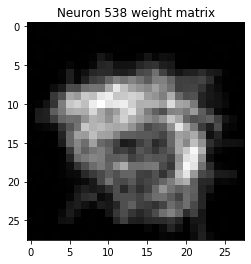

Node number: 539
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 0}


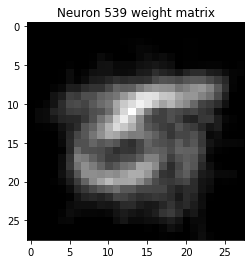

Node number: 540
Correct labels count in node: {0: 1, 1: 0, 2: 1, 3: 1, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


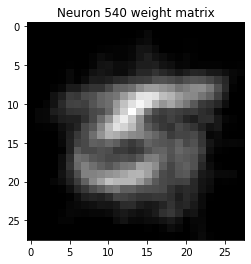

Node number: 541
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 6, 6: 0, 7: 1, 8: 0, 9: 0}


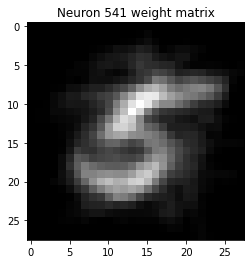

Node number: 542
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


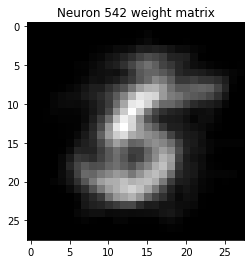

Node number: 543
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0}


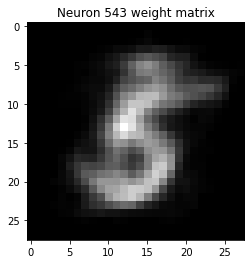

Node number: 544
Correct labels count in node: {0: 2, 1: 0, 2: 0, 3: 1, 4: 1, 5: 2, 6: 3, 7: 0, 8: 0, 9: 0}


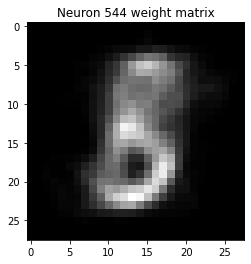

Node number: 545
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 4, 4: 0, 5: 1, 6: 0, 7: 0, 8: 2, 9: 0}


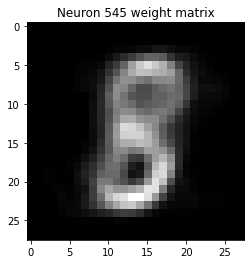

Node number: 546
Correct labels count in node: {0: 2, 1: 0, 2: 1, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 3, 9: 0}


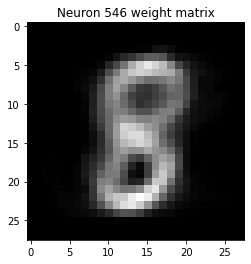

Node number: 547
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 16, 9: 0}


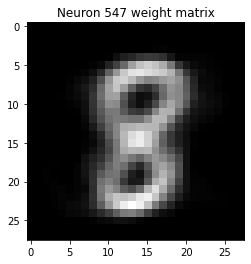

Node number: 548
Correct labels count in node: {0: 1, 1: 0, 2: 1, 3: 1, 4: 0, 5: 2, 6: 0, 7: 0, 8: 7, 9: 0}


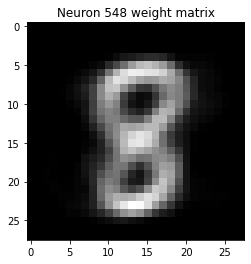

Node number: 549
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 9, 9: 0}


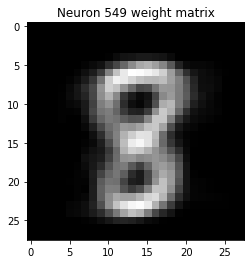

Node number: 550
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 5, 9: 0}


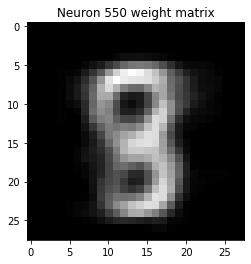

Node number: 551
Correct labels count in node: {0: 0, 1: 0, 2: 5, 3: 4, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1}


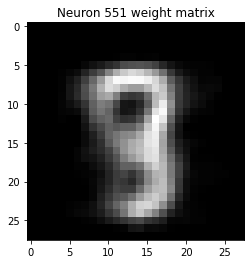

Node number: 552
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 9}


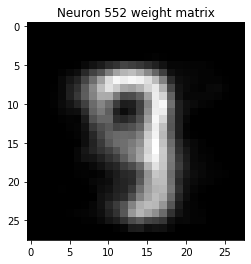

Node number: 553
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 16, 8: 0, 9: 0}


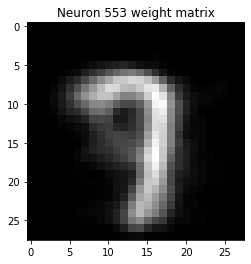

Node number: 554
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


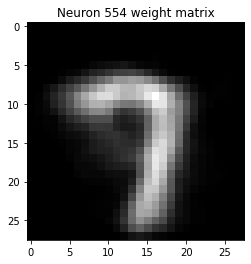

Node number: 555
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


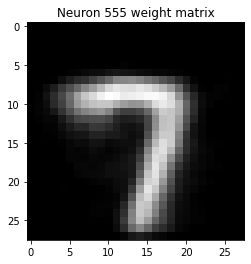

Node number: 556
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 11, 8: 0, 9: 0}


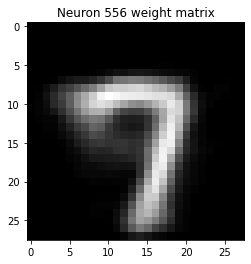

Node number: 557
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 4, 8: 0, 9: 3}


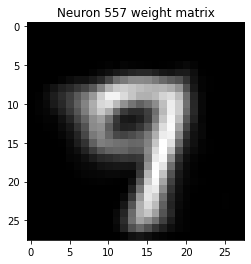

Node number: 558
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 17}


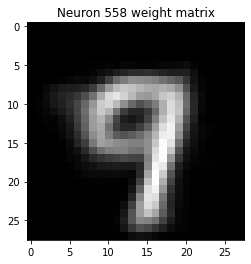

Node number: 559
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 8, 5: 0, 6: 0, 7: 0, 8: 0, 9: 23}


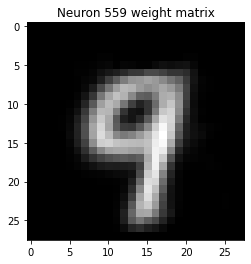

Node number: 560
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 8, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


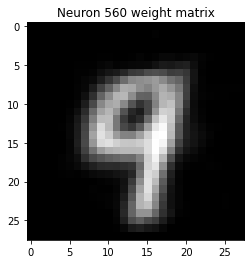

Node number: 561
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 9, 5: 0, 6: 0, 7: 0, 8: 0, 9: 11}


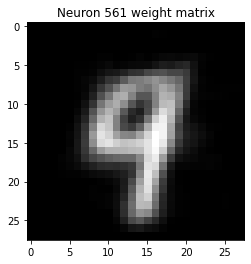

Node number: 562
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 6, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


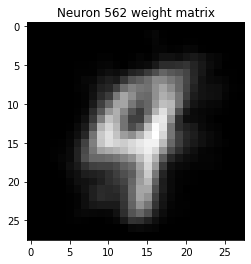

Node number: 563
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


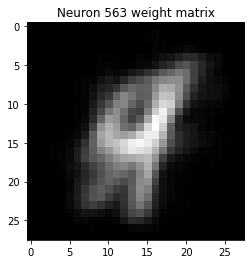

Node number: 564
Correct labels count in node: {0: 0, 1: 0, 2: 2, 3: 1, 4: 4, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0}


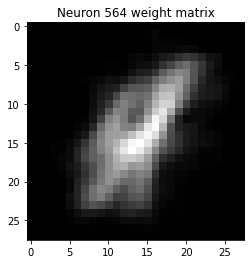

Node number: 565
Correct labels count in node: {0: 0, 1: 8, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


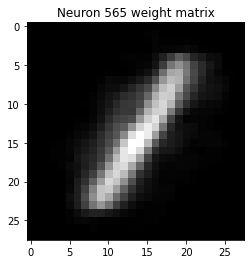

Node number: 566
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


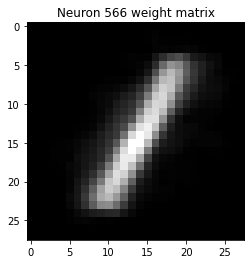

Node number: 567
Correct labels count in node: {0: 0, 1: 17, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


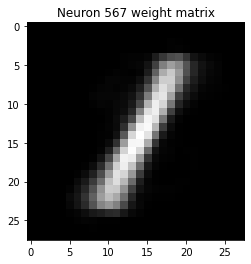

Node number: 568
Correct labels count in node: {0: 0, 1: 11, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


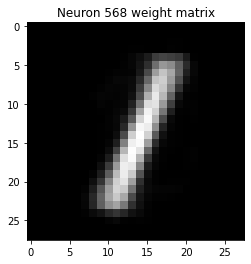

Node number: 569
Correct labels count in node: {0: 0, 1: 7, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


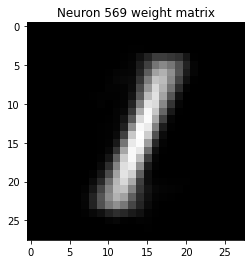

Node number: 570
Correct labels count in node: {0: 0, 1: 18, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


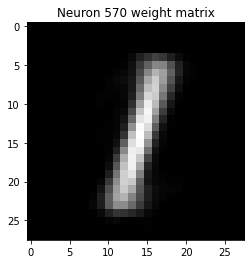

Node number: 571
Correct labels count in node: {0: 0, 1: 12, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


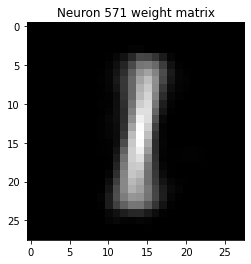

Node number: 572
Correct labels count in node: {0: 0, 1: 6, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


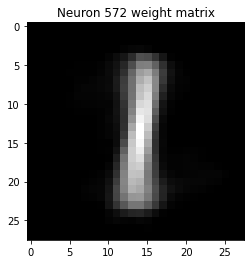

Node number: 573
Correct labels count in node: {0: 0, 1: 33, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


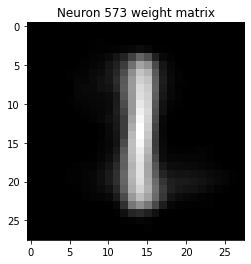

Node number: 574
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


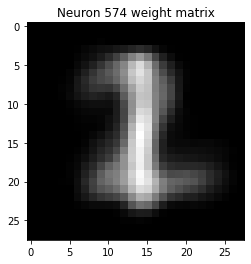

Node number: 575
Correct labels count in node: {0: 0, 1: 1, 2: 2, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


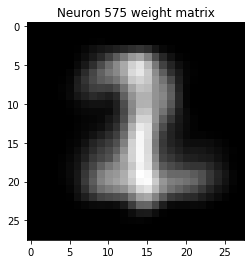

Node number: 576
Correct labels count in node: {0: 0, 1: 0, 2: 25, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


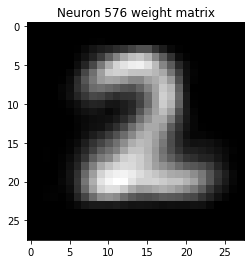

Node number: 577
Correct labels count in node: {0: 0, 1: 0, 2: 8, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


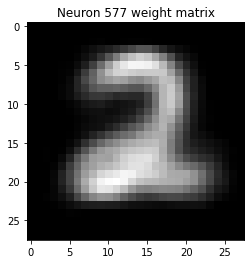

Node number: 578
Correct labels count in node: {0: 0, 1: 0, 2: 13, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


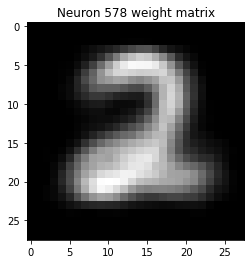

Node number: 579
Correct labels count in node: {0: 1, 1: 0, 2: 32, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


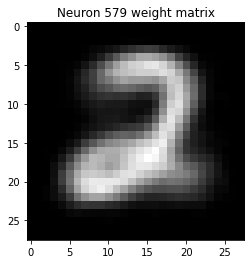

Node number: 580
Correct labels count in node: {0: 0, 1: 0, 2: 7, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


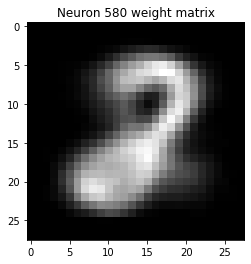

Node number: 581
Correct labels count in node: {0: 0, 1: 0, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 0}


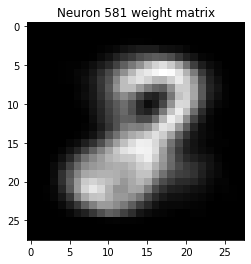

Node number: 582
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 15, 9: 0}


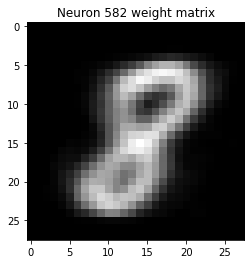

Node number: 583
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 3, 9: 0}


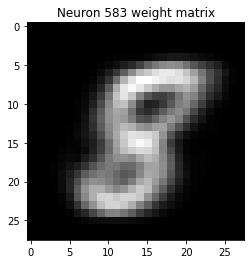

Node number: 584
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 3, 6: 0, 7: 0, 8: 9, 9: 1}


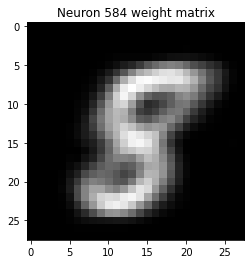

Node number: 585
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 14, 6: 0, 7: 0, 8: 1, 9: 0}


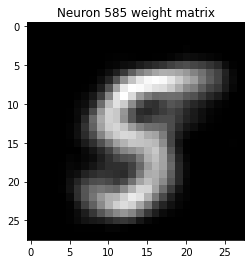

Node number: 586
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 1}


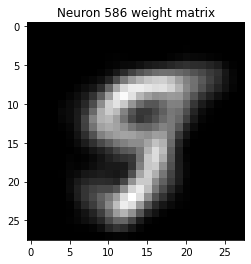

Node number: 587
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 4}


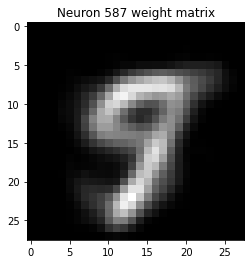

Node number: 588
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 13, 8: 0, 9: 4}


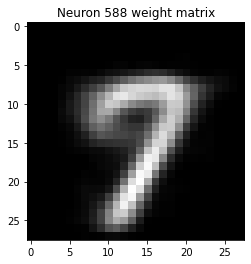

Node number: 589
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 6, 8: 0, 9: 1}


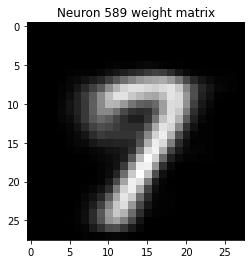

Node number: 590
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 9, 8: 0, 9: 1}


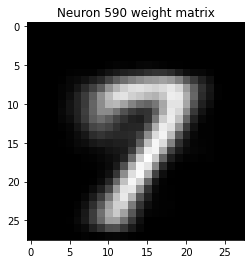

Node number: 591
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 11, 8: 0, 9: 4}


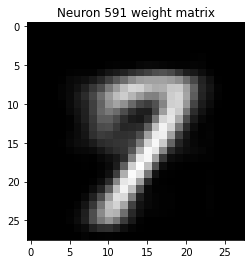

Node number: 592
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 6, 8: 0, 9: 2}


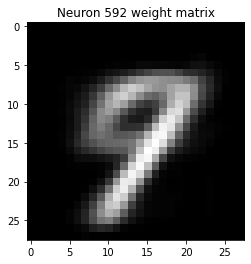

Node number: 593
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


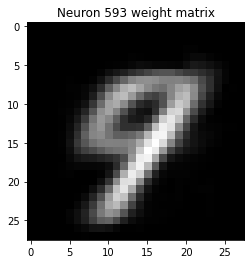

Node number: 594
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 9, 5: 0, 6: 0, 7: 1, 8: 0, 9: 3}


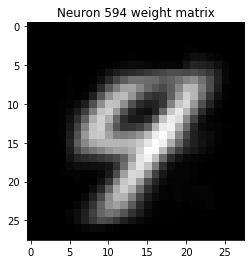

Node number: 595
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 14, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


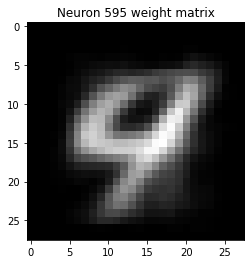

Node number: 596
Correct labels count in node: {0: 0, 1: 0, 2: 2, 3: 0, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


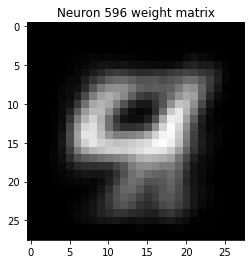

Node number: 597
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 18, 5: 0, 6: 1, 7: 0, 8: 0, 9: 12}


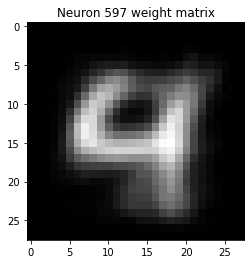

Node number: 598
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 7, 5: 0, 6: 0, 7: 1, 8: 0, 9: 9}


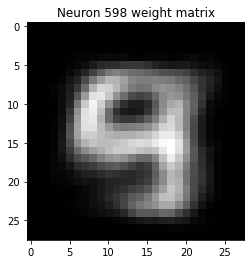

Node number: 599
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 2, 8: 1, 9: 2}


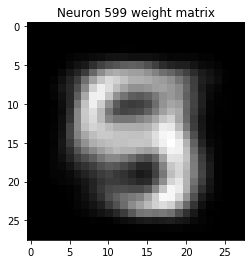

Node number: 600
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 5, 6: 0, 7: 0, 8: 8, 9: 2}


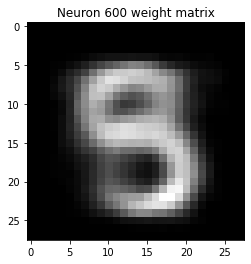

Node number: 601
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 5, 4: 0, 5: 5, 6: 0, 7: 0, 8: 2, 9: 0}


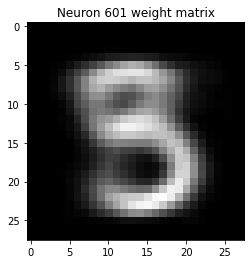

Node number: 602
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 2, 6: 0, 7: 0, 8: 1, 9: 0}


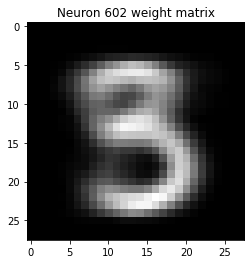

Node number: 603
Correct labels count in node: {0: 2, 1: 0, 2: 0, 3: 14, 4: 0, 5: 5, 6: 0, 7: 0, 8: 0, 9: 0}


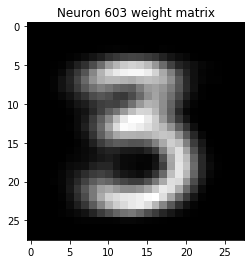

Node number: 604
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 10, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


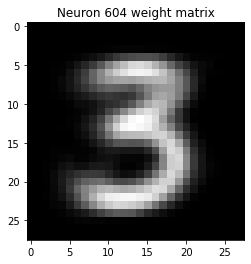

Node number: 605
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


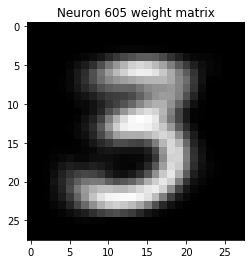

Node number: 606
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 17, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}


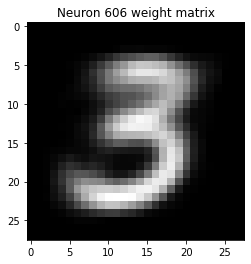

Node number: 607
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 8, 4: 0, 5: 5, 6: 0, 7: 0, 8: 1, 9: 0}


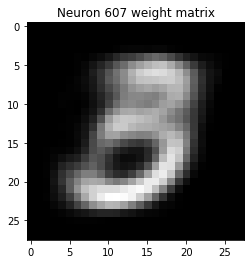

Node number: 608
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 1}


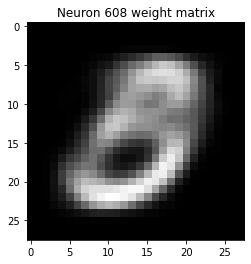

Node number: 609
Correct labels count in node: {0: 12, 1: 0, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}


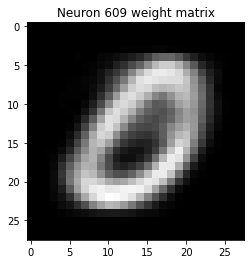

Node number: 610
Correct labels count in node: {0: 15, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


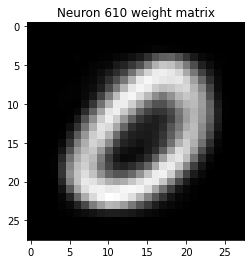

Node number: 611
Correct labels count in node: {0: 6, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


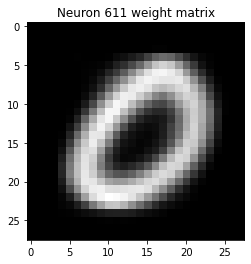

Node number: 612
Correct labels count in node: {0: 14, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


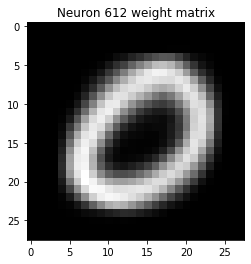

Node number: 613
Correct labels count in node: {0: 8, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


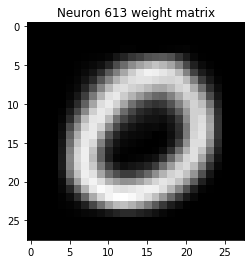

Node number: 614
Correct labels count in node: {0: 12, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


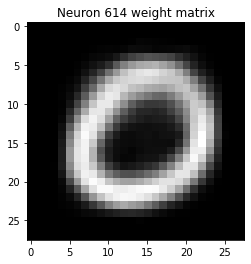

Node number: 615
Correct labels count in node: {0: 10, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 1, 7: 0, 8: 1, 9: 0}


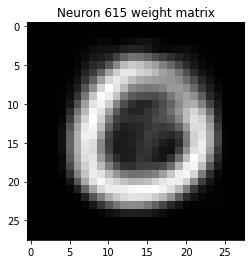

Node number: 616
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 0, 8: 0, 9: 0}


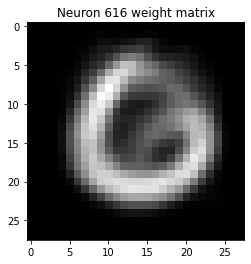

Node number: 617
Correct labels count in node: {0: 3, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 7, 7: 0, 8: 0, 9: 1}


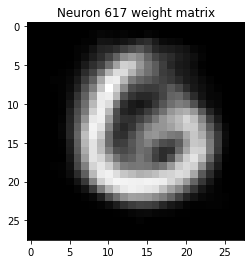

Node number: 618
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 14, 7: 0, 8: 0, 9: 0}


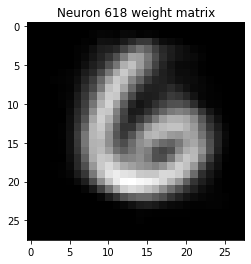

Node number: 619
Correct labels count in node: {0: 2, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 16, 7: 0, 8: 0, 9: 0}


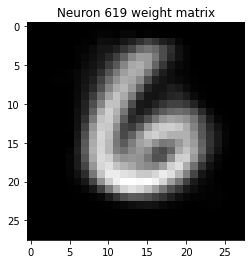

Node number: 620
Correct labels count in node: {0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 16, 7: 0, 8: 0, 9: 1}


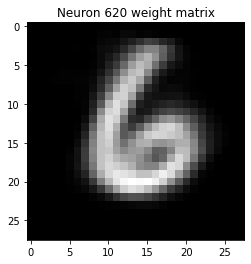

Node number: 621
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 10, 7: 0, 8: 0, 9: 0}


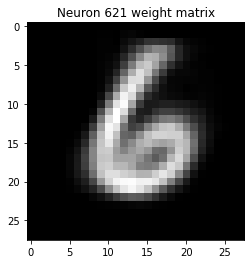

Node number: 622
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 5, 7: 0, 8: 0, 9: 0}


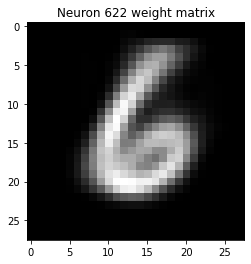

Node number: 623
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 7, 7: 0, 8: 0, 9: 0}


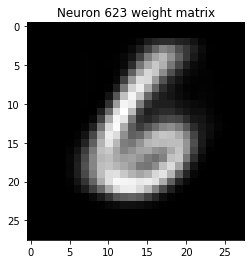

Node number: 624
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 10, 7: 0, 8: 0, 9: 0}


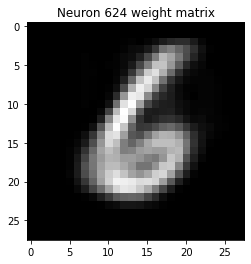

In [135]:
neighborhood = [-2, -1, 1, 2]
linear_som = SOM(28*28, 625, neighborhood, max_epochs=40, learning_rate=0.15)
train_start_time = time.time()
linear_som.train(x_train)
train_time = time.time() - train_start_time
print(f"Train time: {train_time} s")
linear_som.test(x_test, y_test)

## Test SOM with R=1 Square neighborhood

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Train time: 131.9727520942688 s
Winner nodes count: 327
Node number: 0
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


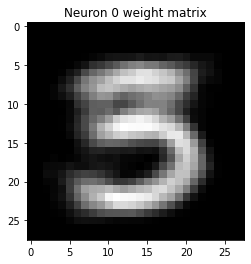

Node number: 1
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


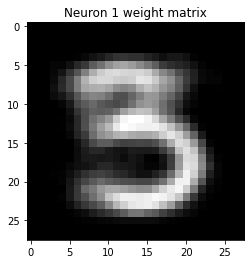

Node number: 2
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 3, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}


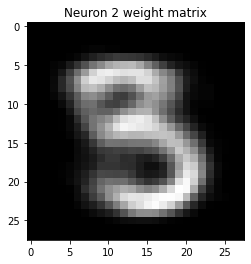

Node number: 3
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


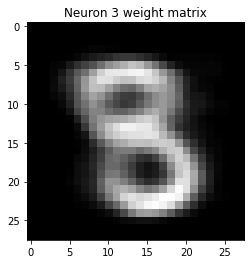

Node number: 4
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 1}


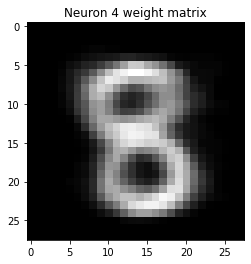

Node number: 5
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 4, 9: 1}


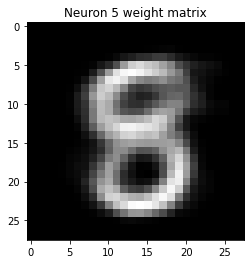

Node number: 6
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 0}


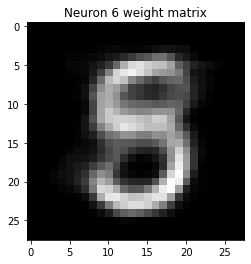

Node number: 7
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


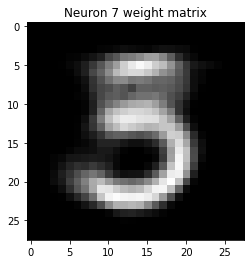

Node number: 8
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


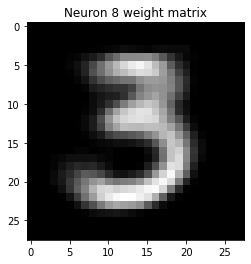

Node number: 9
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 4, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


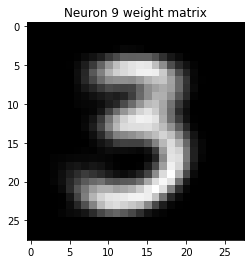

Node number: 10
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


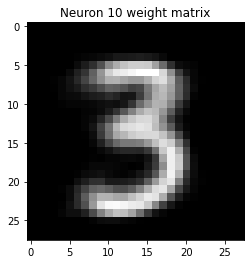

Node number: 11
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


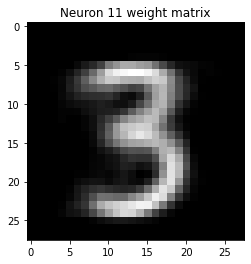

Node number: 12
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


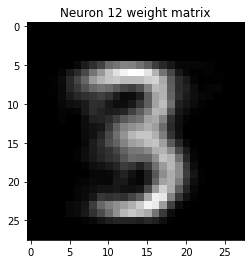

Node number: 13
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


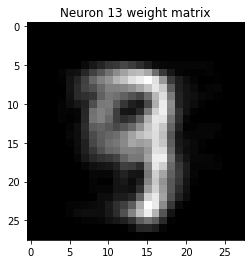

Node number: 14
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 10}


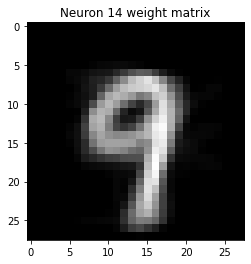

Node number: 15
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 7}


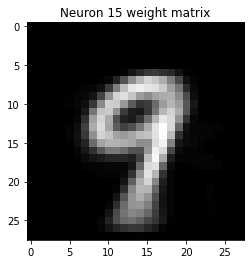

Node number: 16
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 5}


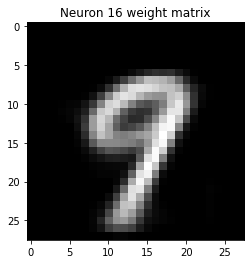

Node number: 17
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 4, 8: 0, 9: 0}


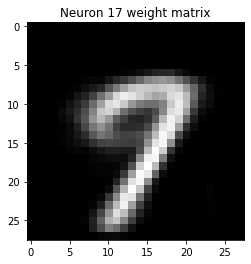

Node number: 18
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


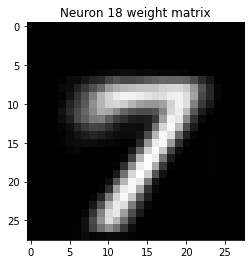

Node number: 19
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 7, 8: 0, 9: 0}


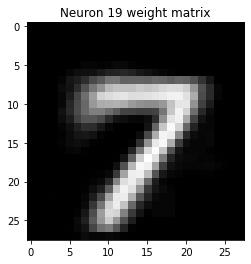

Node number: 20
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


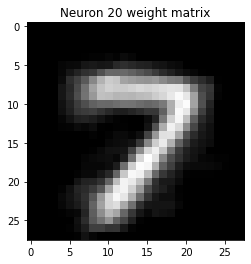

Node number: 21
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


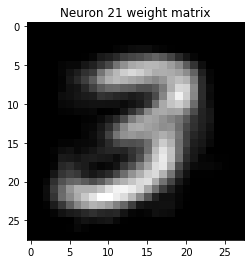

Node number: 22
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 7, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


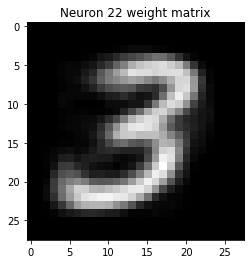

Node number: 23
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 6, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


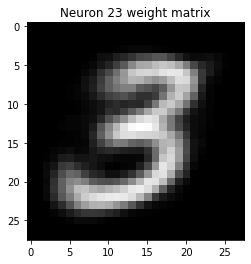

Node number: 25
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


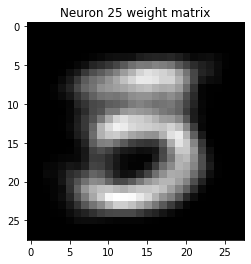

Node number: 26
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


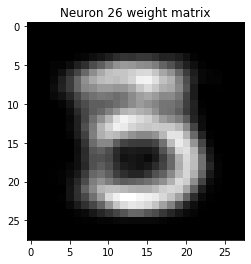

Node number: 27
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


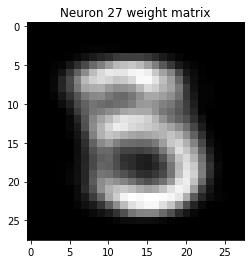

Node number: 28
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


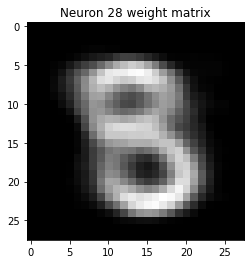

Node number: 29
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 3, 6: 0, 7: 0, 8: 2, 9: 0}


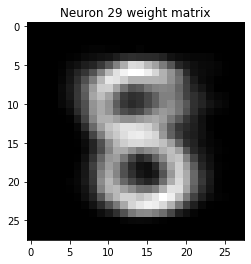

Node number: 30
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


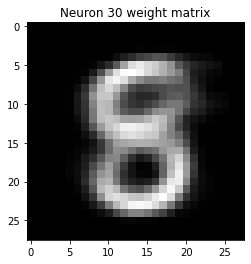

Node number: 32
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


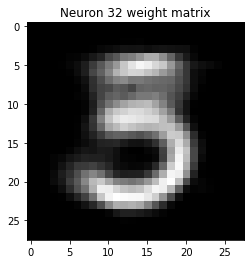

Node number: 33
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


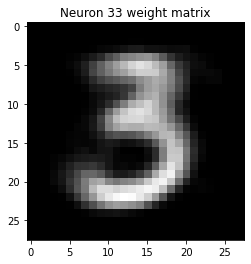

Node number: 34
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


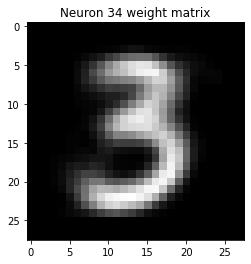

Node number: 35
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 9, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


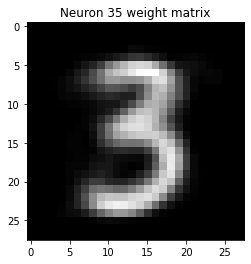

Node number: 36
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}


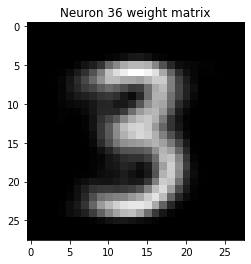

Node number: 37
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


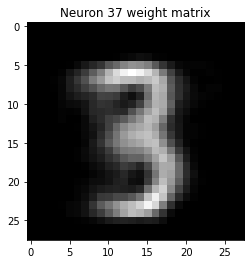

Node number: 38
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


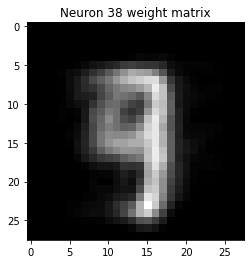

Node number: 39
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


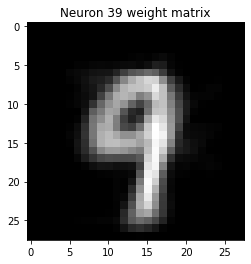

Node number: 41
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


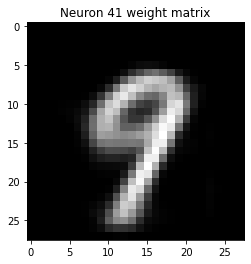

Node number: 42
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 1}


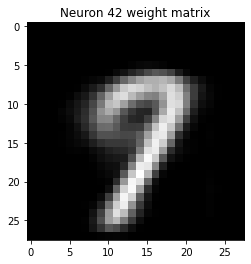

Node number: 43
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


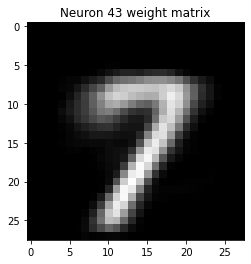

Node number: 44
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


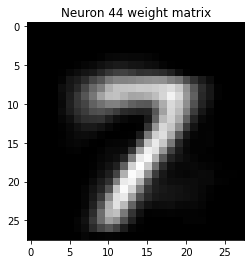

Node number: 45
Correct labels count in node: {0: 0, 1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


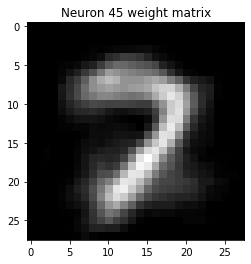

Node number: 48
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


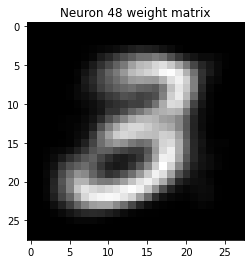

Node number: 49
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


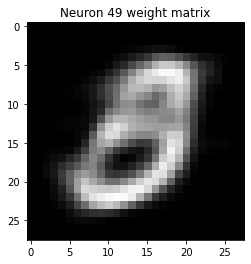

Node number: 50
Correct labels count in node: {0: 2, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


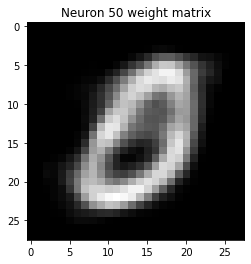

Node number: 51
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


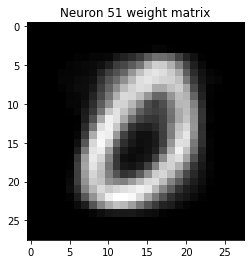

Node number: 52
Correct labels count in node: {0: 5, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


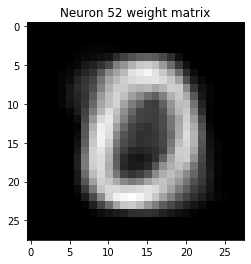

Node number: 53
Correct labels count in node: {0: 3, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


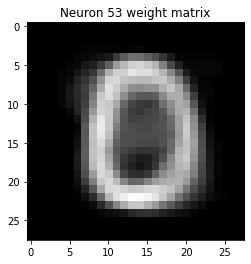

Node number: 54
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


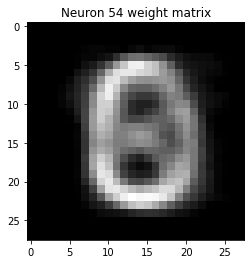

Node number: 55
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


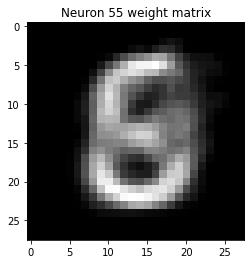

Node number: 57
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


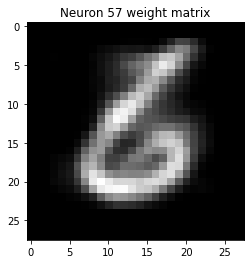

Node number: 60
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 3, 6: 0, 7: 0, 8: 2, 9: 0}


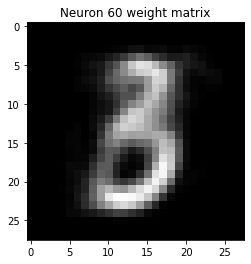

Node number: 61
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


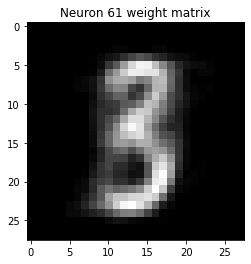

Node number: 63
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2}


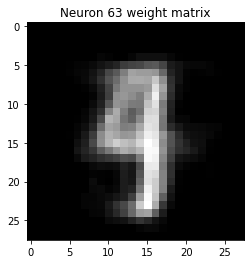

Node number: 64
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


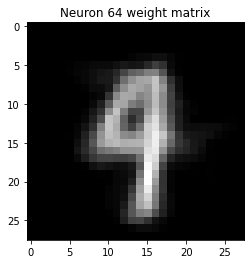

Node number: 65
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 2}


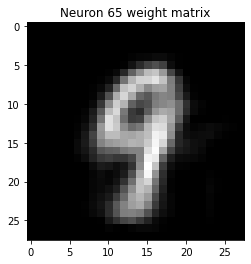

Node number: 66
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 5}


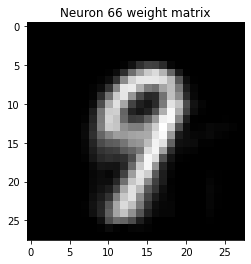

Node number: 67
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 3}


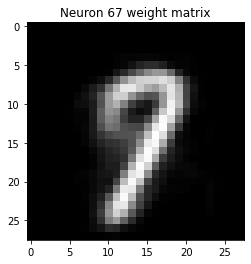

Node number: 68
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 4, 8: 0, 9: 1}


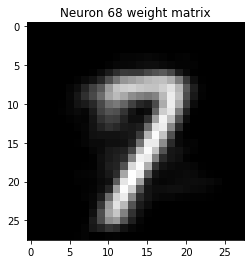

Node number: 70
Correct labels count in node: {0: 0, 1: 0, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


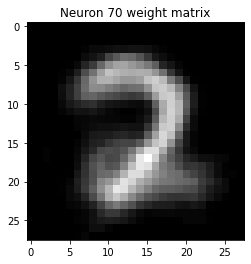

Node number: 71
Correct labels count in node: {0: 0, 1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


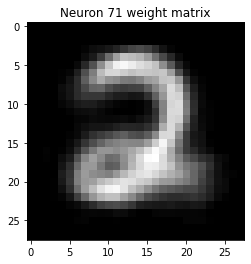

Node number: 72
Correct labels count in node: {0: 1, 1: 0, 2: 13, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


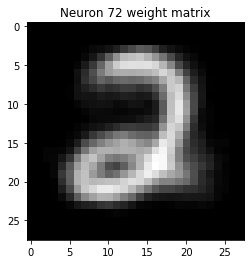

Node number: 73
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


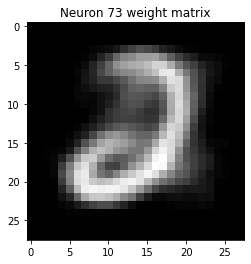

Node number: 74
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1}


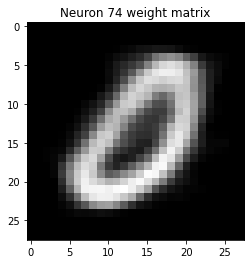

Node number: 75
Correct labels count in node: {0: 2, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


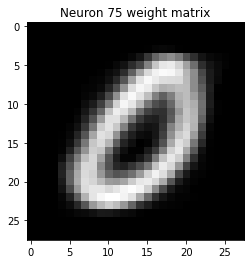

Node number: 76
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


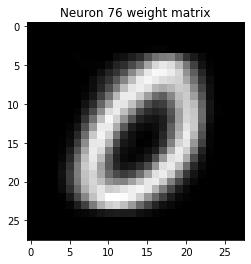

Node number: 77
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


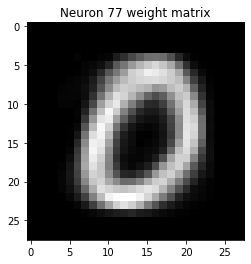

Node number: 78
Correct labels count in node: {0: 5, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


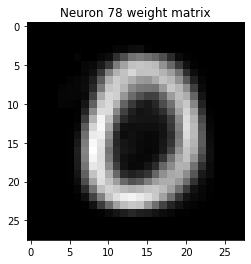

Node number: 79
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


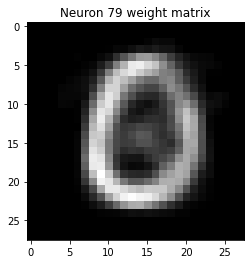

Node number: 81
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


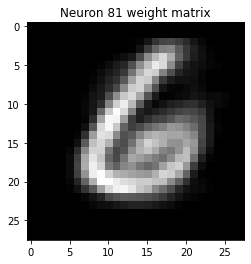

Node number: 82
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


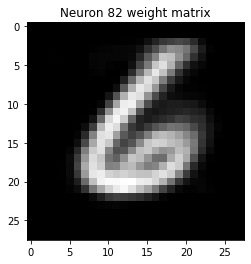

Node number: 83
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


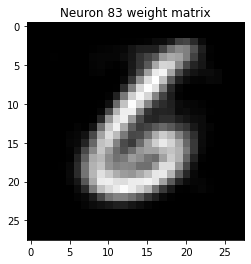

Node number: 84
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


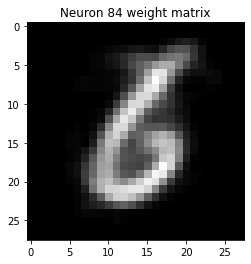

Node number: 85
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


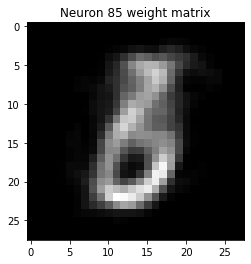

Node number: 86
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}


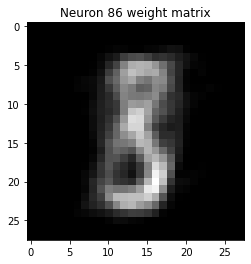

Node number: 89
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


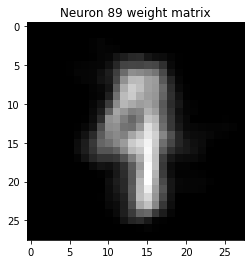

Node number: 90
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


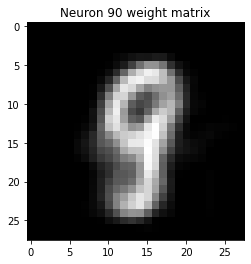

Node number: 91
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


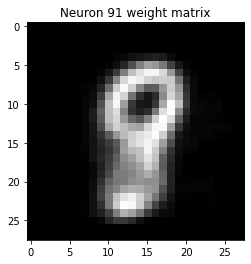

Node number: 94
Correct labels count in node: {0: 0, 1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


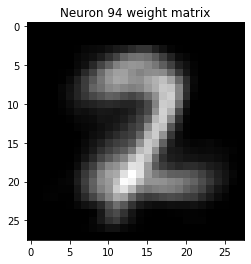

Node number: 95
Correct labels count in node: {0: 0, 1: 1, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


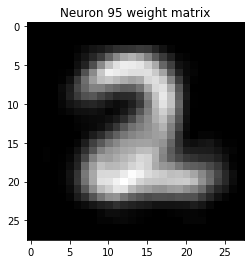

Node number: 96
Correct labels count in node: {0: 0, 1: 0, 2: 4, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


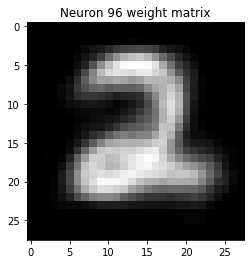

Node number: 97
Correct labels count in node: {0: 0, 1: 0, 2: 8, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


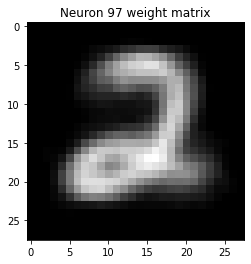

Node number: 98
Correct labels count in node: {0: 0, 1: 0, 2: 5, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


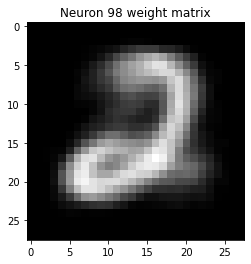

Node number: 99
Correct labels count in node: {0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


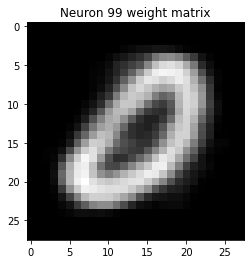

Node number: 100
Correct labels count in node: {0: 3, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


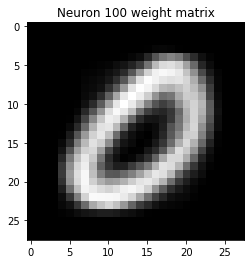

Node number: 101
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


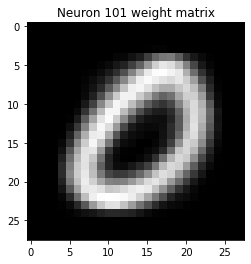

Node number: 102
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


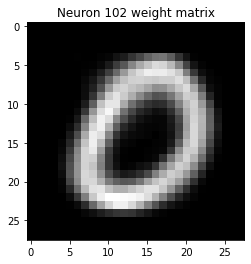

Node number: 103
Correct labels count in node: {0: 5, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


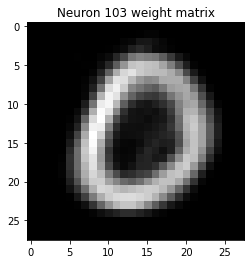

Node number: 105
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


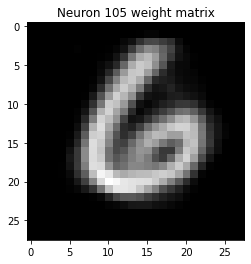

Node number: 106
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 5, 7: 0, 8: 0, 9: 0}


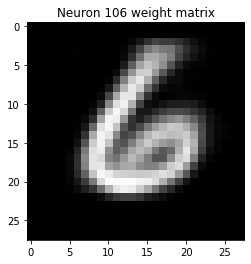

Node number: 107
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0}


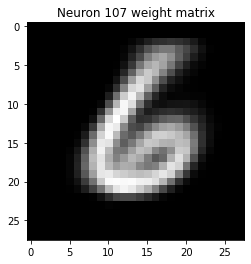

Node number: 108
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0}


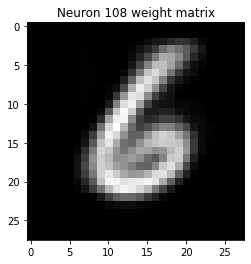

Node number: 109
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 4, 7: 0, 8: 0, 9: 0}


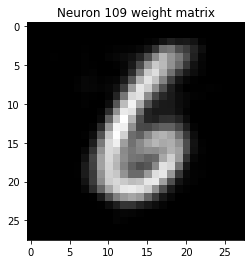

Node number: 110
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0}


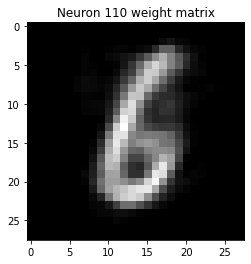

Node number: 112
Correct labels count in node: {0: 0, 1: 7, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


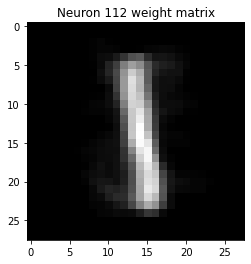

Node number: 114
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


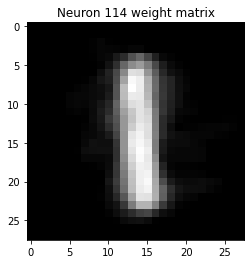

Node number: 115
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


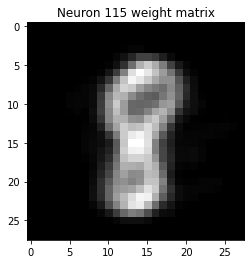

Node number: 116
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 15, 9: 0}


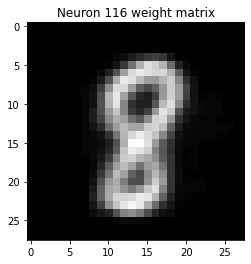

Node number: 117
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


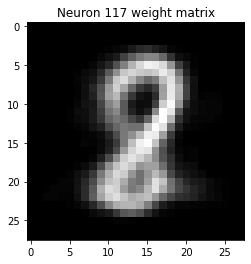

Node number: 118
Correct labels count in node: {0: 0, 1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


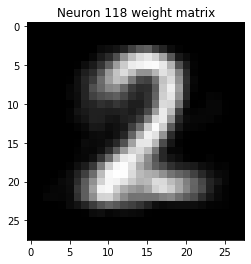

Node number: 119
Correct labels count in node: {0: 0, 1: 0, 2: 8, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


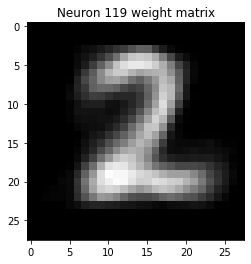

Node number: 120
Correct labels count in node: {0: 0, 1: 0, 2: 7, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


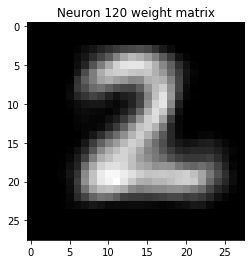

Node number: 121
Correct labels count in node: {0: 0, 1: 0, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


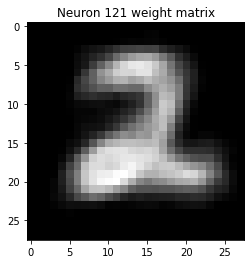

Node number: 122
Correct labels count in node: {0: 0, 1: 0, 2: 4, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


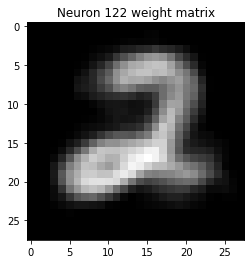

Node number: 123
Correct labels count in node: {0: 0, 1: 0, 2: 8, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


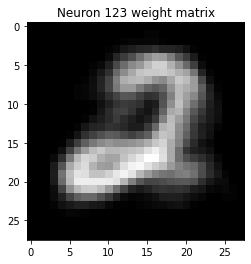

Node number: 124
Correct labels count in node: {0: 3, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


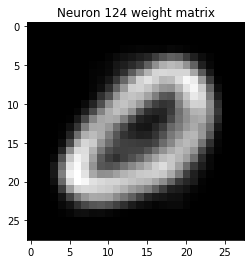

Node number: 125
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


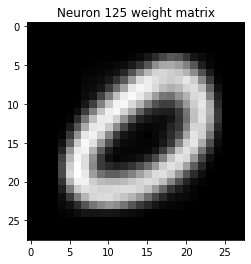

Node number: 126
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


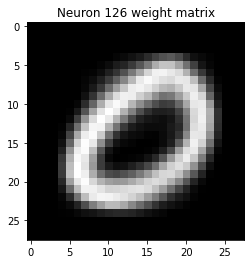

Node number: 127
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


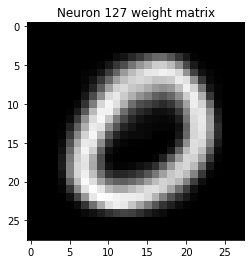

Node number: 128
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


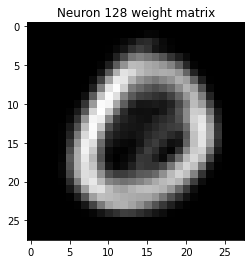

Node number: 129
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


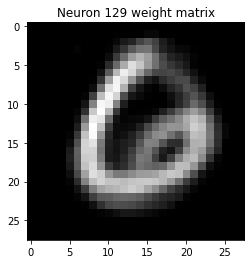

Node number: 130
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 9, 7: 0, 8: 0, 9: 0}


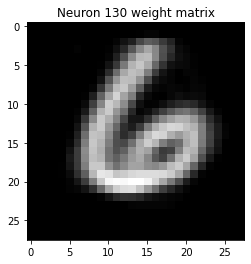

Node number: 131
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 5, 7: 0, 8: 0, 9: 0}


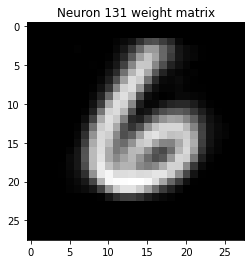

Node number: 132
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


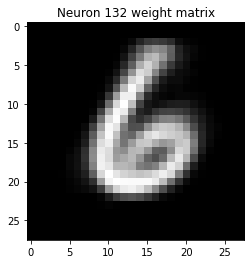

Node number: 133
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 8, 7: 0, 8: 0, 9: 0}


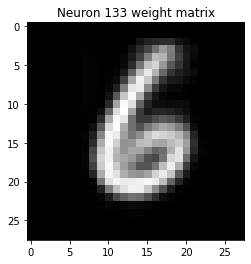

Node number: 134
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


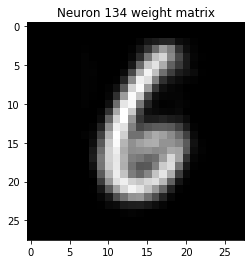

Node number: 135
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 0, 8: 0, 9: 0}


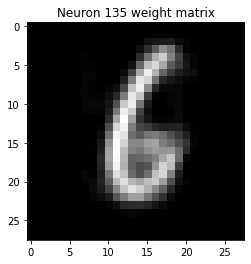

Node number: 137
Correct labels count in node: {0: 0, 1: 9, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


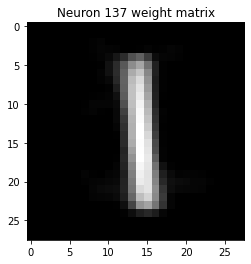

Node number: 138
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


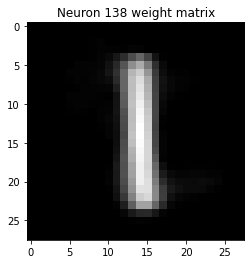

Node number: 139
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


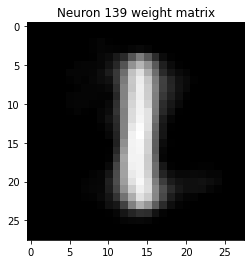

Node number: 141
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


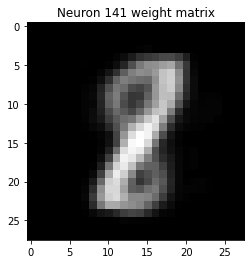

Node number: 142
Correct labels count in node: {0: 0, 1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


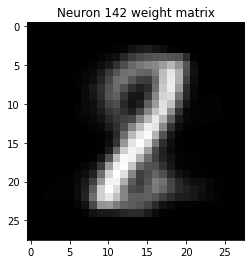

Node number: 143
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


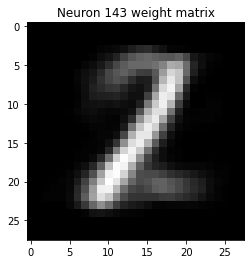

Node number: 144
Correct labels count in node: {0: 0, 1: 0, 2: 4, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


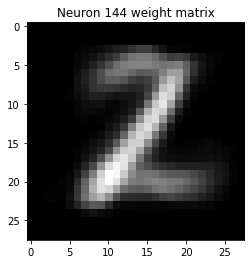

Node number: 146
Correct labels count in node: {0: 0, 1: 0, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


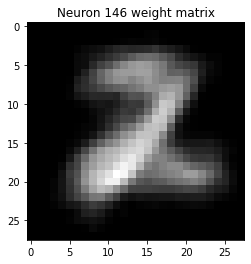

Node number: 147
Correct labels count in node: {0: 0, 1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


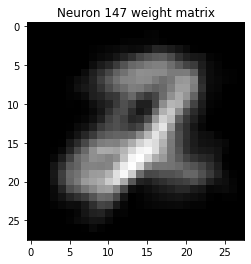

Node number: 148
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


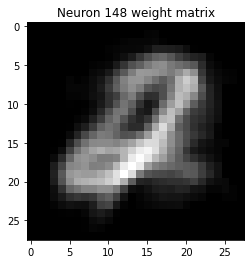

Node number: 149
Correct labels count in node: {0: 3, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


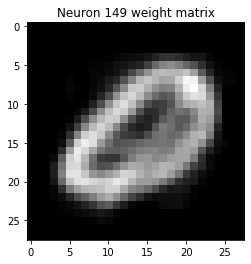

Node number: 150
Correct labels count in node: {0: 7, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


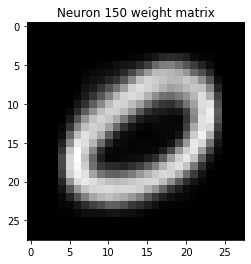

Node number: 151
Correct labels count in node: {0: 3, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


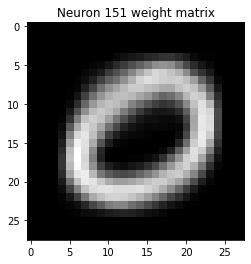

Node number: 152
Correct labels count in node: {0: 4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


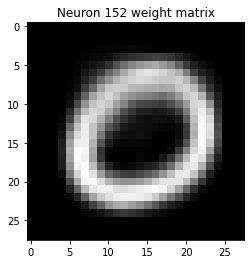

Node number: 153
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


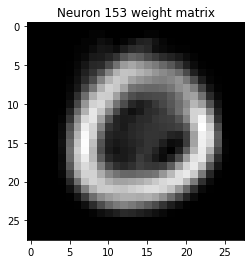

Node number: 154
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0}


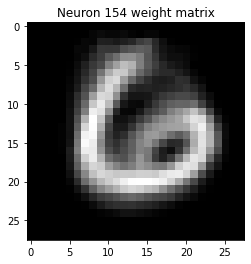

Node number: 155
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 0, 8: 0, 9: 0}


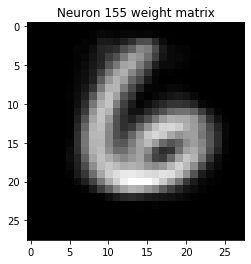

Node number: 156
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 6, 7: 0, 8: 0, 9: 0}


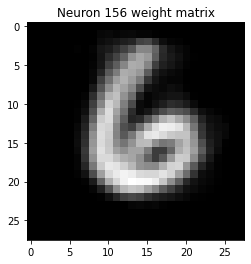

Node number: 157
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


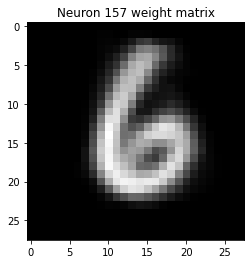

Node number: 158
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


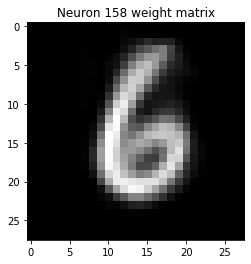

Node number: 160
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0}


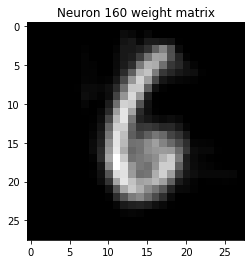

Node number: 161
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


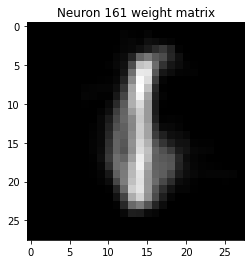

Node number: 162
Correct labels count in node: {0: 0, 1: 7, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


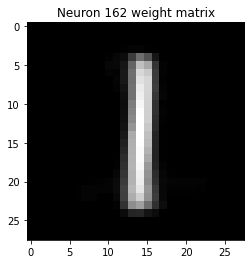

Node number: 163
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


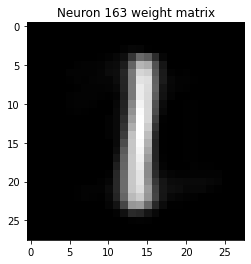

Node number: 164
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


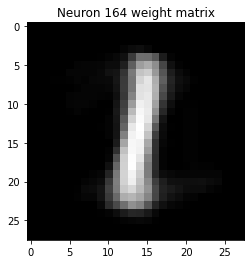

Node number: 165
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


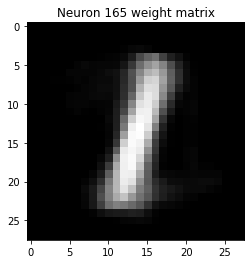

Node number: 166
Correct labels count in node: {0: 0, 1: 4, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


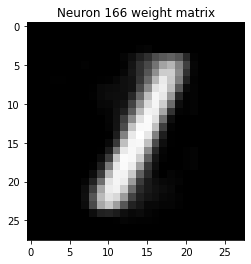

Node number: 167
Correct labels count in node: {0: 0, 1: 8, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


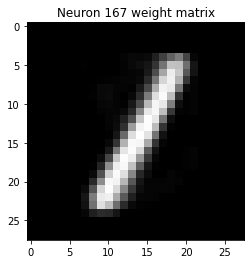

Node number: 168
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


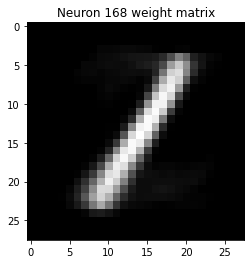

Node number: 169
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


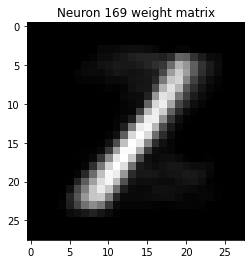

Node number: 170
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


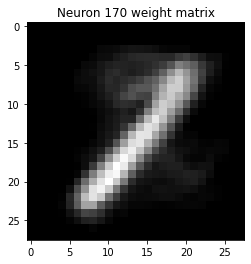

Node number: 171
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


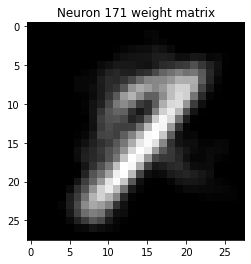

Node number: 172
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


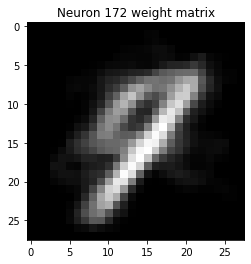

Node number: 175
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


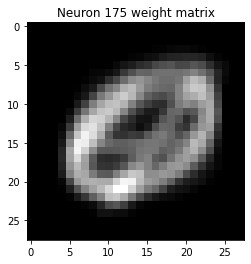

Node number: 176
Correct labels count in node: {0: 2, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


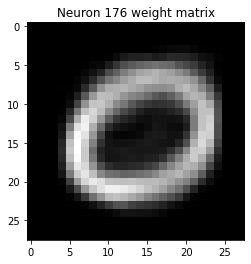

Node number: 177
Correct labels count in node: {0: 6, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


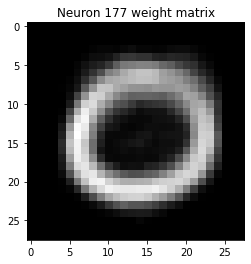

Node number: 178
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0}


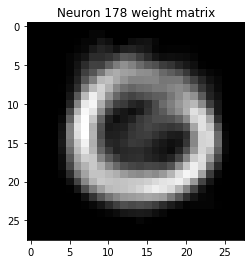

Node number: 179
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 5, 7: 0, 8: 0, 9: 0}


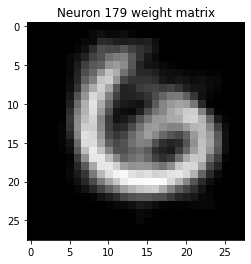

Node number: 180
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 0, 8: 0, 9: 0}


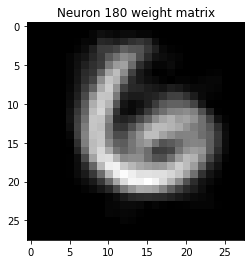

Node number: 181
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 6, 7: 0, 8: 0, 9: 0}


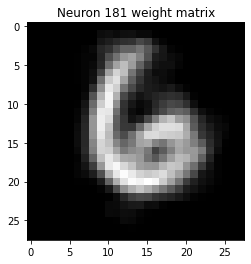

Node number: 182
Correct labels count in node: {0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 9, 7: 0, 8: 0, 9: 1}


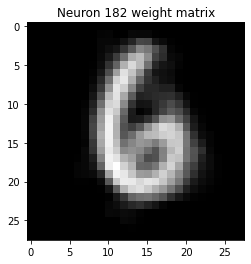

Node number: 183
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 4, 7: 0, 8: 0, 9: 0}


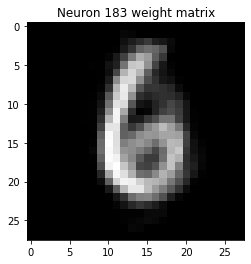

Node number: 185
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


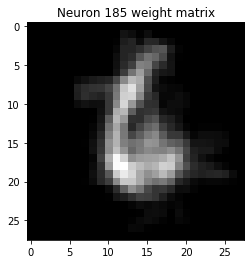

Node number: 187
Correct labels count in node: {0: 0, 1: 5, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


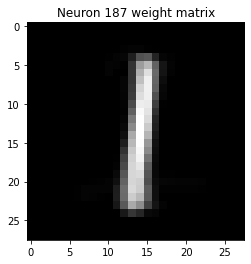

Node number: 188
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


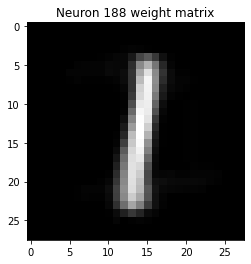

Node number: 189
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


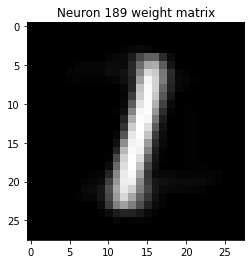

Node number: 190
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


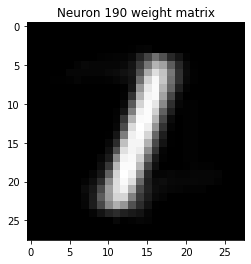

Node number: 191
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


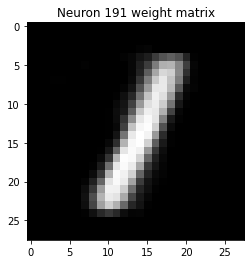

Node number: 195
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


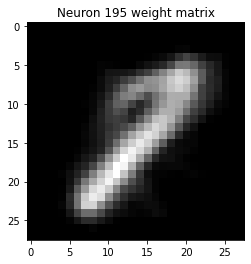

Node number: 196
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


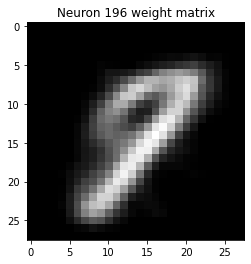

Node number: 197
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


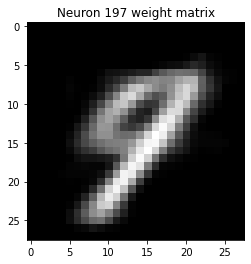

Node number: 199
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 7, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


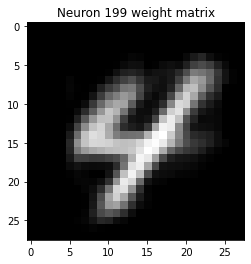

Node number: 200
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


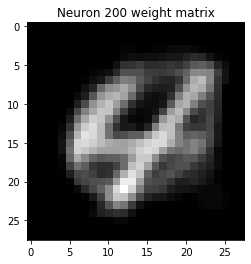

Node number: 202
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


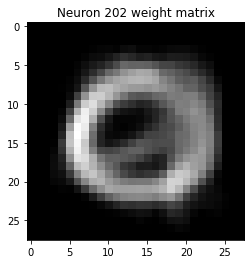

Node number: 204
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 2, 7: 0, 8: 0, 9: 1}


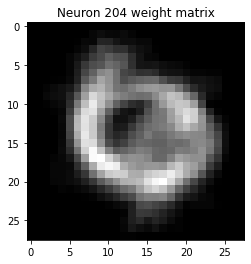

Node number: 205
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


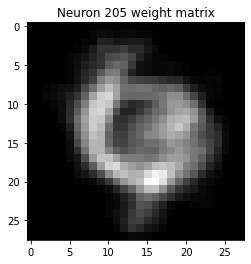

Node number: 210
Correct labels count in node: {0: 0, 1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


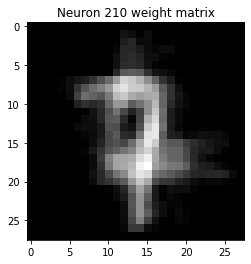

Node number: 211
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


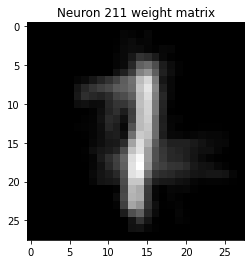

Node number: 212
Correct labels count in node: {0: 0, 1: 5, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


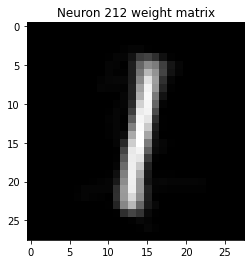

Node number: 213
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


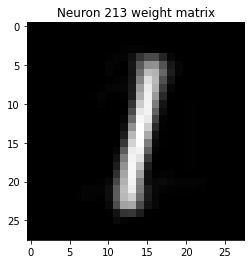

Node number: 214
Correct labels count in node: {0: 0, 1: 5, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


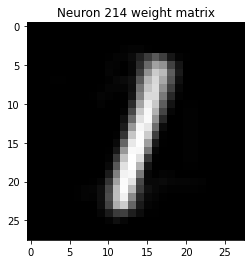

Node number: 215
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


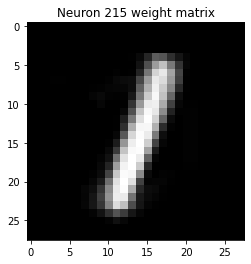

Node number: 216
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


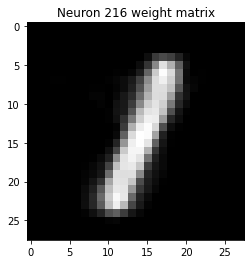

Node number: 217
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


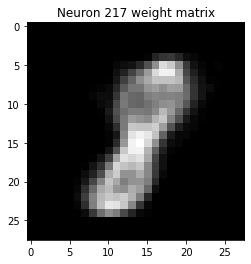

Node number: 218
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


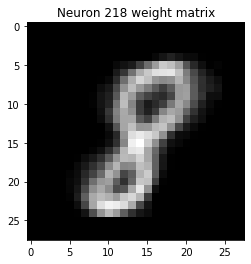

Node number: 220
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 0}


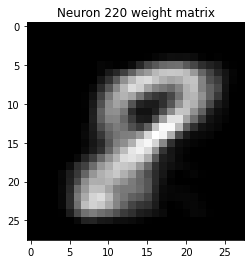

Node number: 221
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 0}


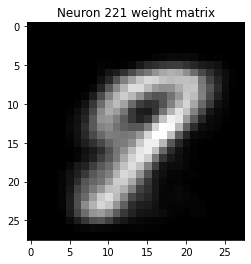

Node number: 222
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 1}


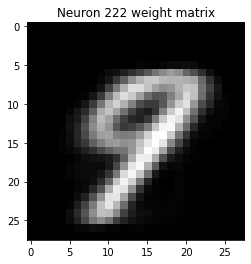

Node number: 223
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


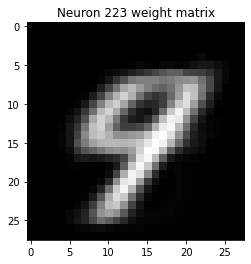

Node number: 224
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


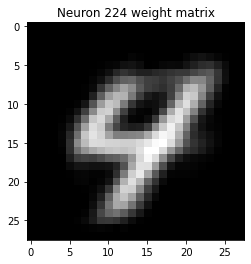

Node number: 225
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


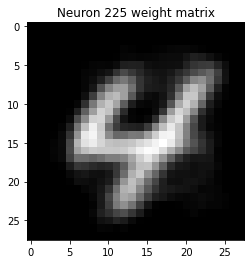

Node number: 227
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


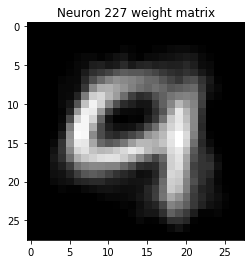

Node number: 229
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2}


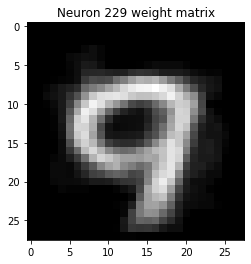

Node number: 230
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 1}


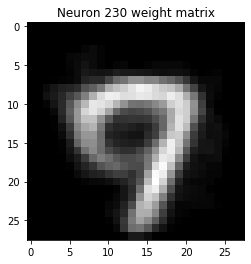

Node number: 232
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


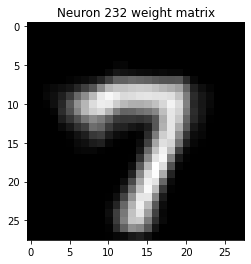

Node number: 233
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 4, 8: 0, 9: 0}


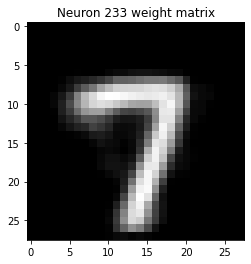

Node number: 234
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


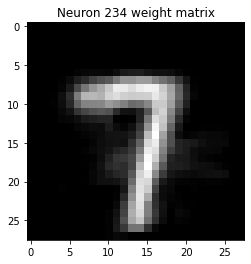

Node number: 235
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


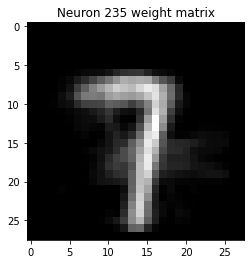

Node number: 237
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


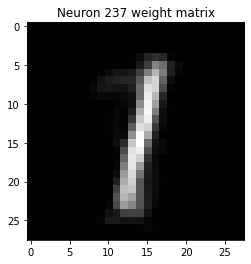

Node number: 238
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


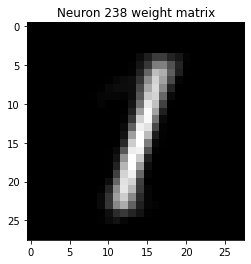

Node number: 239
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


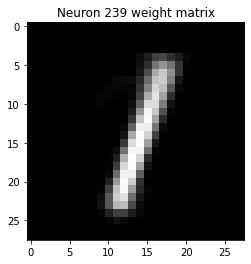

Node number: 242
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


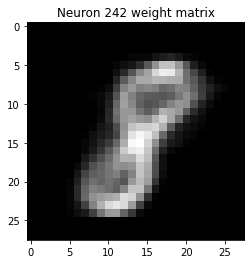

Node number: 243
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


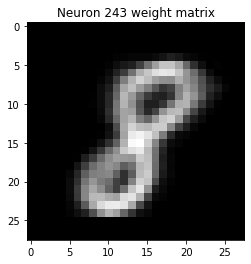

Node number: 244
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 0}


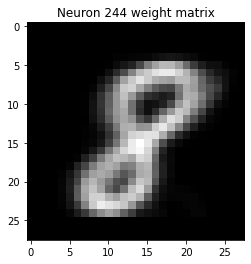

Node number: 245
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


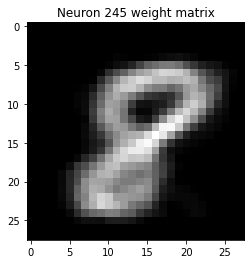

Node number: 248
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


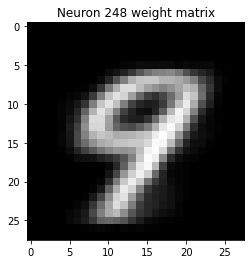

Node number: 249
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


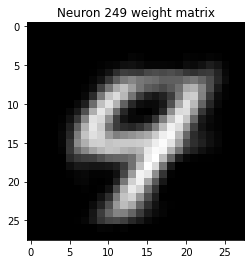

Node number: 250
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 5, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


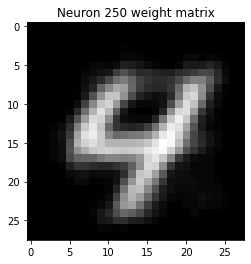

Node number: 251
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


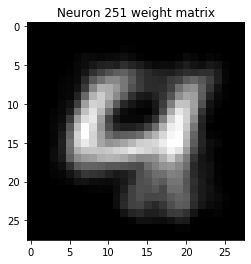

Node number: 252
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


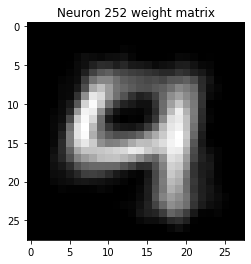

Node number: 253
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


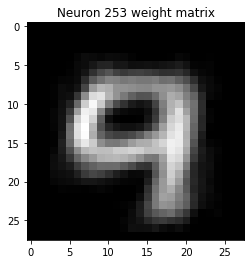

Node number: 254
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 3}


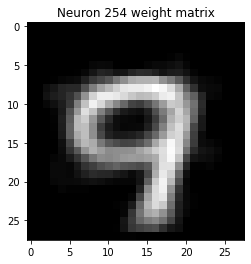

Node number: 256
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


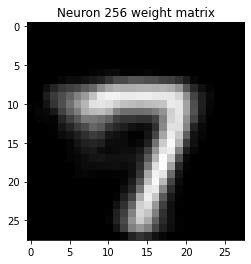

Node number: 257
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


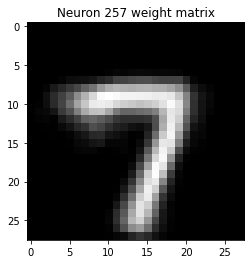

Node number: 258
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


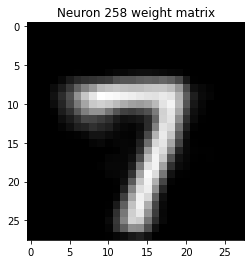

Node number: 259
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 5, 8: 0, 9: 0}


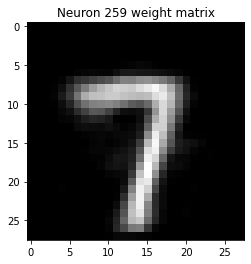

Node number: 260
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 7, 8: 0, 9: 0}


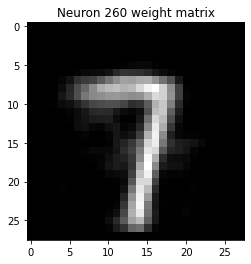

Node number: 261
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


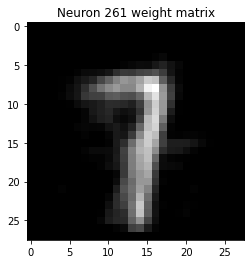

Node number: 264
Correct labels count in node: {0: 0, 1: 7, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


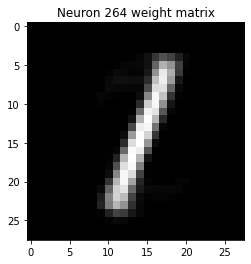

Node number: 265
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


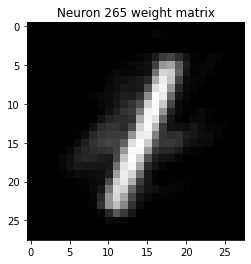

Node number: 266
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


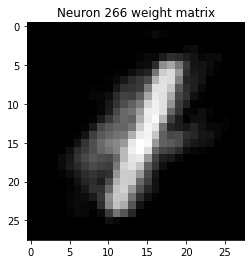

Node number: 268
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 0}


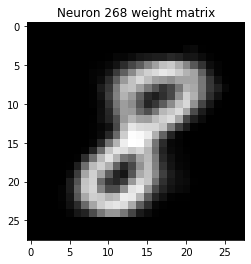

Node number: 269
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 0}


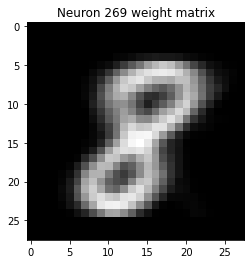

Node number: 270
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


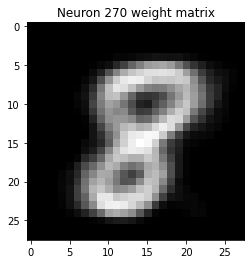

Node number: 271
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


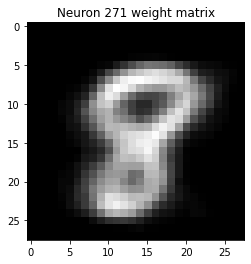

Node number: 273
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1}


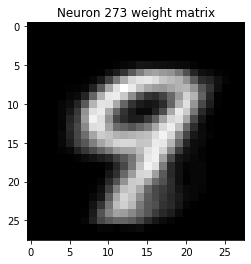

Node number: 274
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 3}


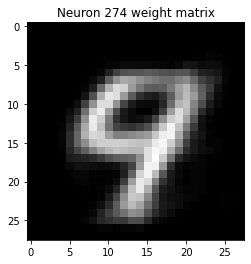

Node number: 275
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


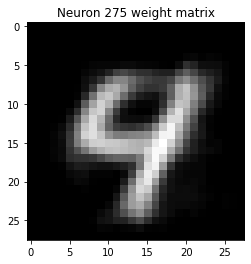

Node number: 276
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


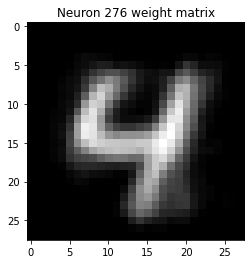

Node number: 277
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


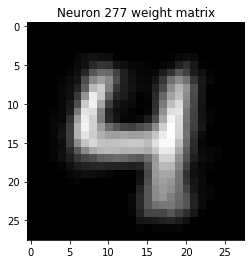

Node number: 278
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


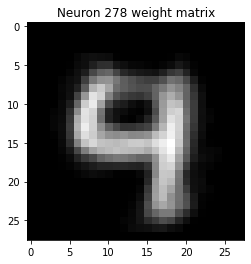

Node number: 279
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 3}


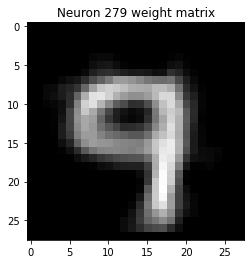

Node number: 280
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


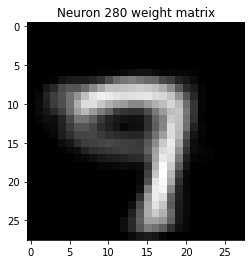

Node number: 281
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


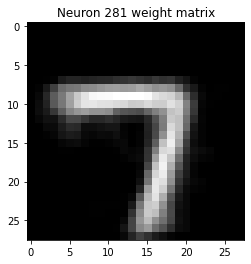

Node number: 283
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


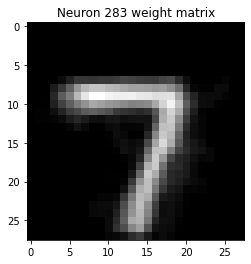

Node number: 284
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


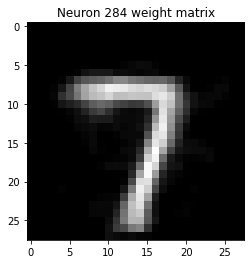

Node number: 285
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


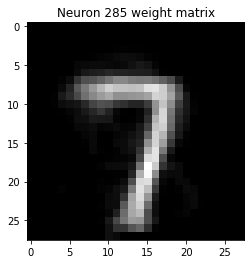

Node number: 288
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


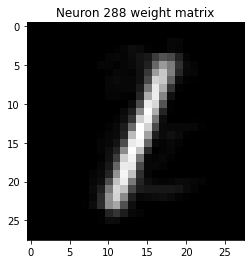

Node number: 289
Correct labels count in node: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


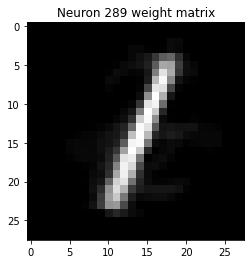

Node number: 290
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


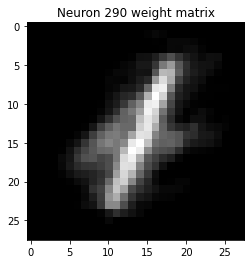

Node number: 292
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


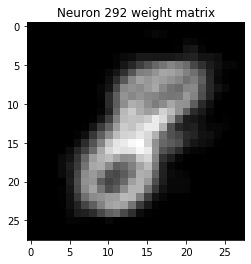

Node number: 293
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


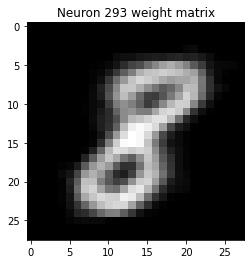

Node number: 295
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 3, 9: 0}


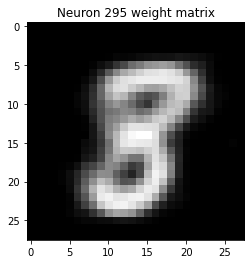

Node number: 296
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 7, 9: 0}


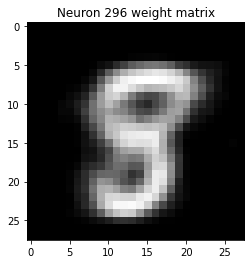

Node number: 298
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


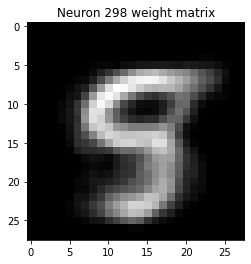

Node number: 299
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 3}


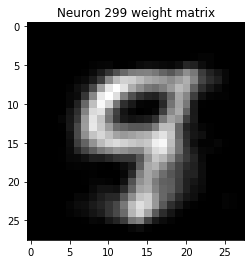

Node number: 300
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


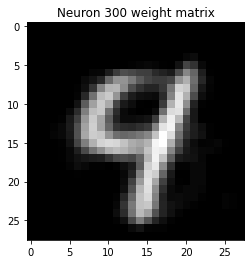

Node number: 301
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


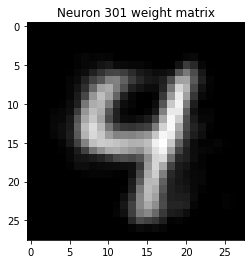

Node number: 302
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


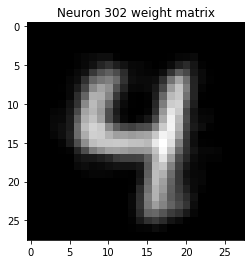

Node number: 303
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


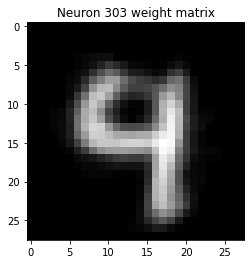

Node number: 304
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 3}


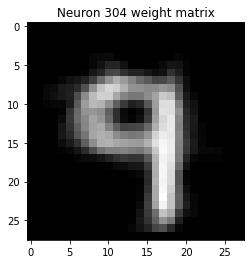

Node number: 306
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 4, 8: 0, 9: 0}


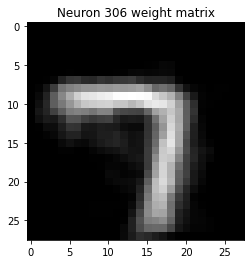

Node number: 309
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 3, 8: 0, 9: 0}


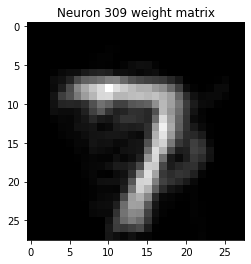

Node number: 312
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


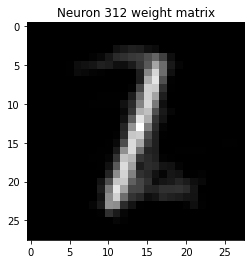

Node number: 313
Correct labels count in node: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


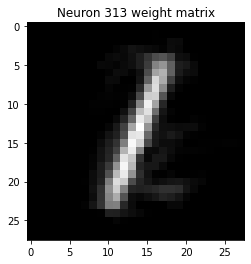

Node number: 314
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


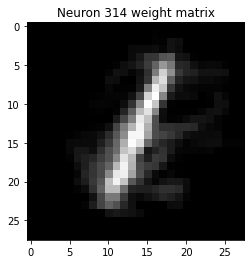

Node number: 315
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


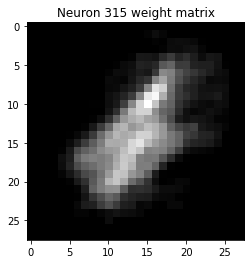

Node number: 316
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


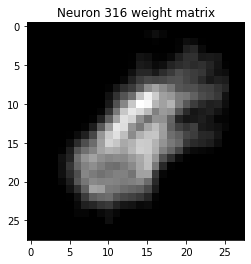

Node number: 318
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


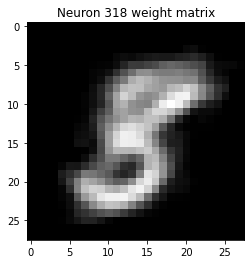

Node number: 319
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


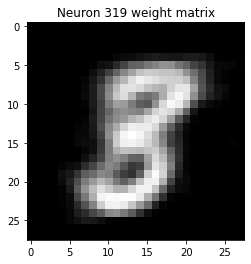

Node number: 320
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 1}


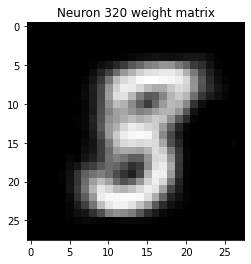

Node number: 322
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


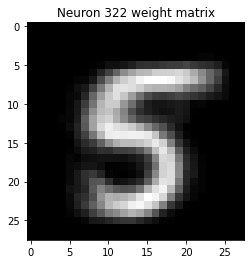

Node number: 323
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 0}


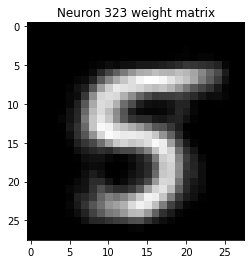

Node number: 324
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


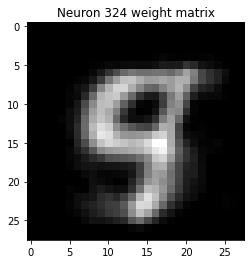

Node number: 325
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


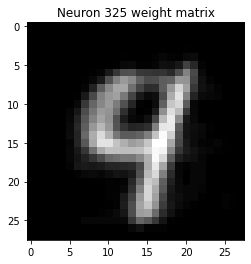

Node number: 326
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


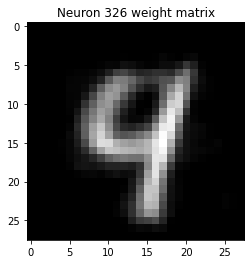

Node number: 327
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


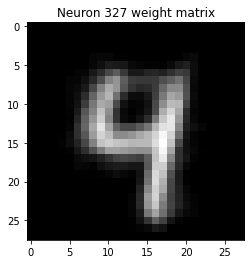

Node number: 328
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2}


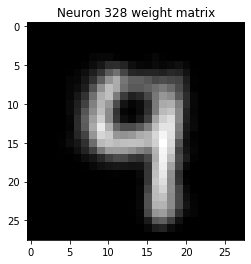

Node number: 329
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 9}


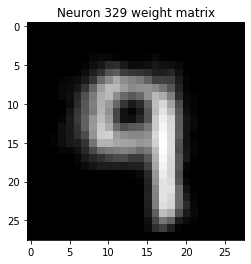

Node number: 330
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


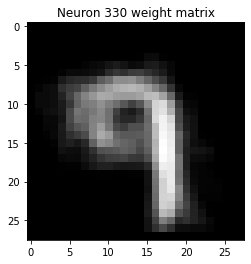

Node number: 331
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0}


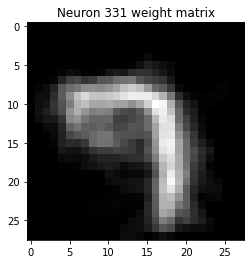

Node number: 333
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


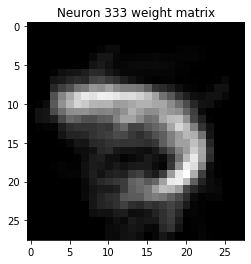

Node number: 338
Correct labels count in node: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


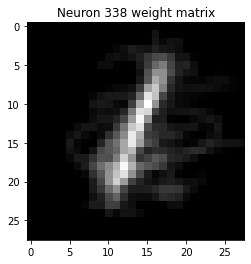

Node number: 344
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


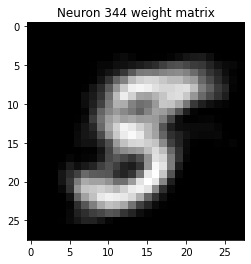

Node number: 345
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 4, 6: 0, 7: 0, 8: 0, 9: 0}


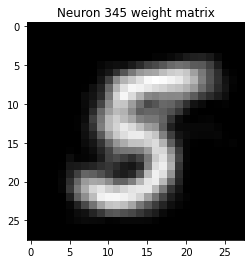

Node number: 346
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 4, 6: 0, 7: 0, 8: 0, 9: 0}


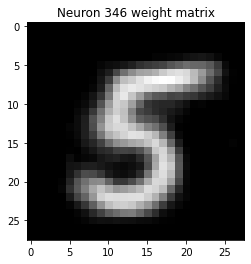

Node number: 347
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


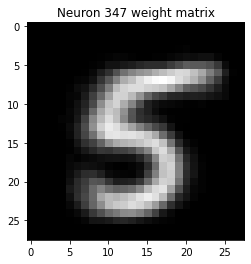

Node number: 348
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


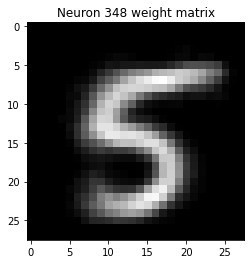

Node number: 349
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


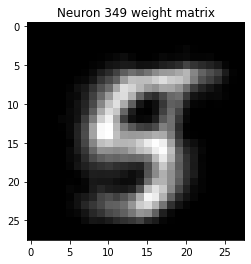

Node number: 350
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


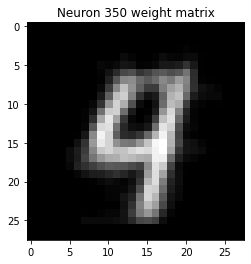

Node number: 351
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


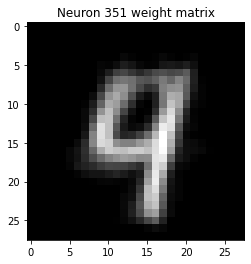

Node number: 352
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 6}


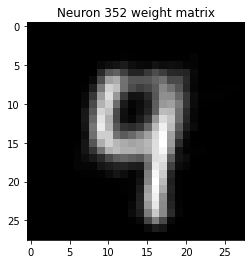

Node number: 354
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 4}


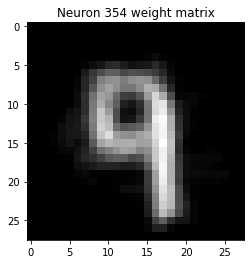

Node number: 355
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 1, 8: 0, 9: 1}


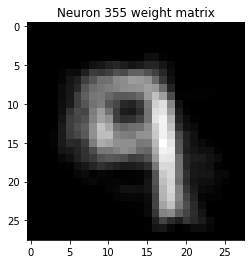

Node number: 356
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


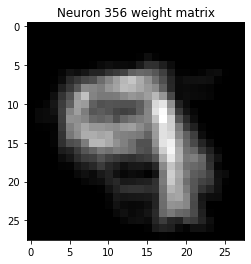

Node number: 357
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


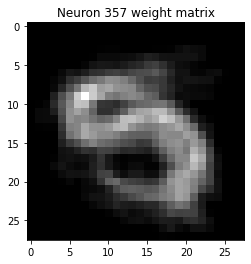

Node number: 358
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


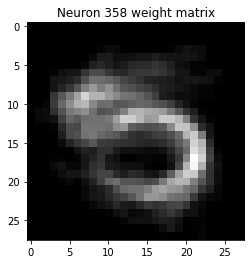

Node number: 365
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


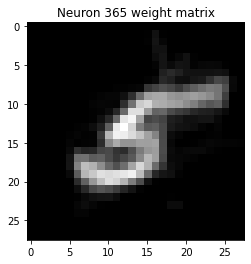

Node number: 366
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


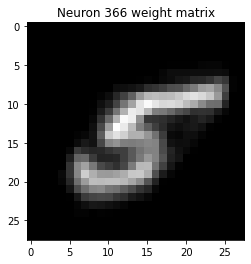

Node number: 367
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


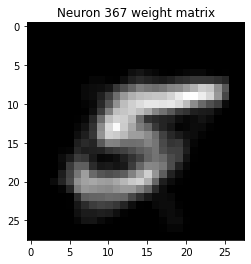

Node number: 368
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


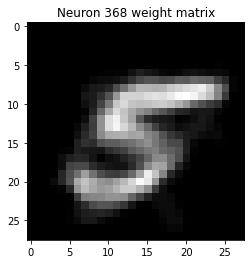

Node number: 369
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


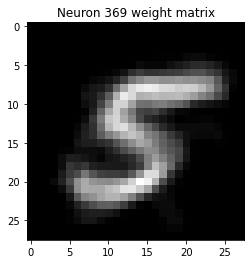

Node number: 370
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 0}


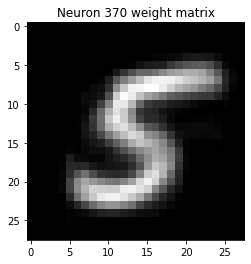

Node number: 371
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0}


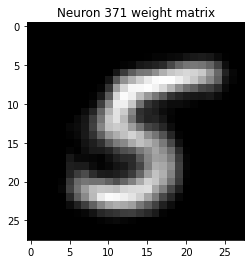

Node number: 372
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 4, 6: 0, 7: 0, 8: 0, 9: 0}


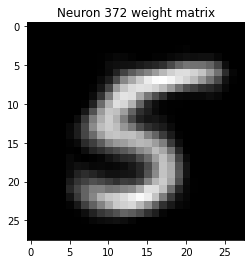

Node number: 375
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2}


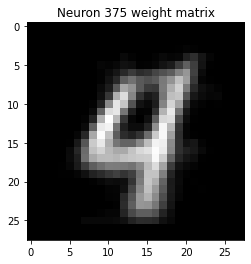

Node number: 376
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


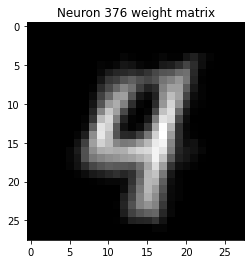

Node number: 377
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 7, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


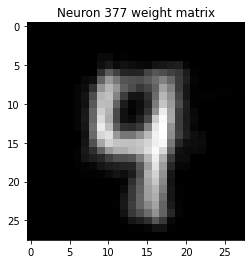

Node number: 378
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


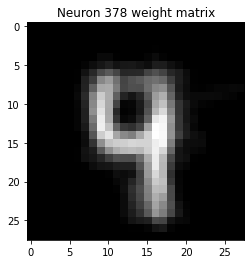

Node number: 379
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 0}


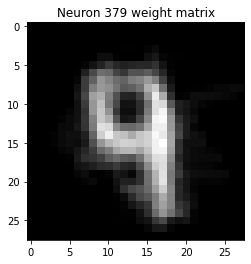

Node number: 380
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


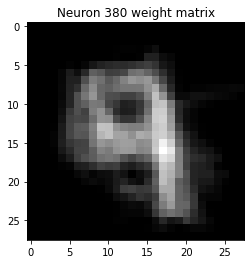

Node number: 382
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


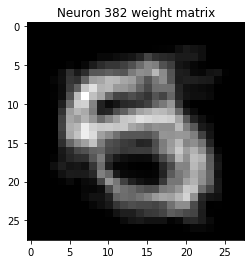

Node number: 383
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 0}


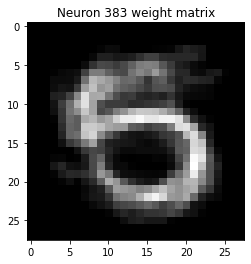

Node number: 384
Correct labels count in node: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


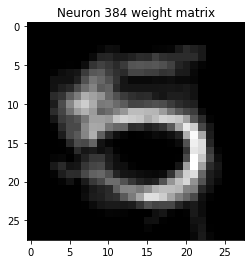

Node number: 390
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


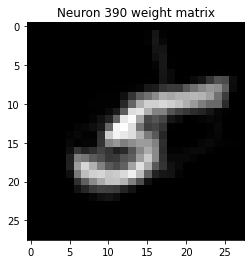

Node number: 391
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


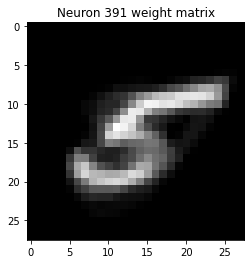

Node number: 393
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


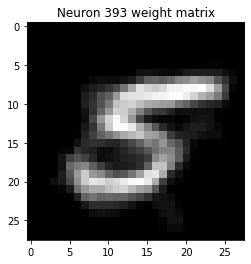

Node number: 394
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


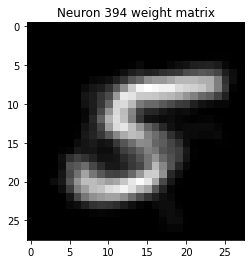

Node number: 398
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


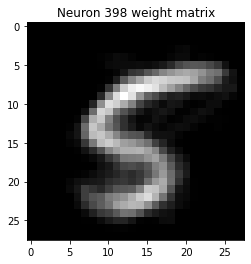

Node number: 400
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


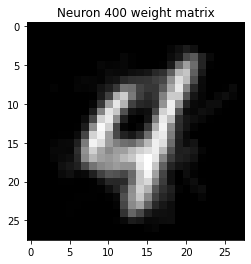

Node number: 401
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1}


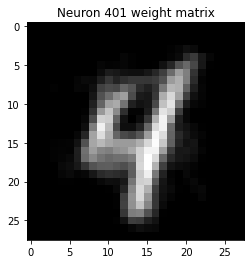

Node number: 402
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2}


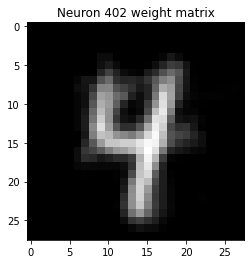

Node number: 405
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


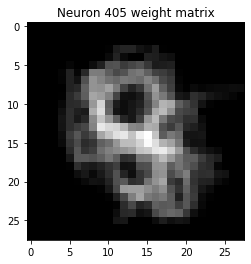

Node number: 406
Correct labels count in node: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


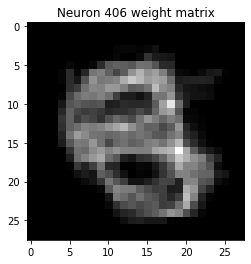

Node number: 407
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


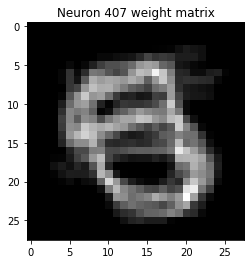

Node number: 417
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


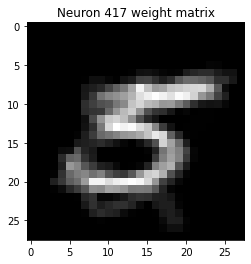

Node number: 419
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


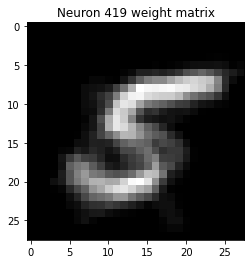

Node number: 420
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


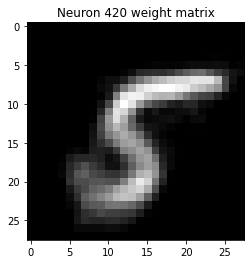

Node number: 421
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 3, 6: 0, 7: 0, 8: 0, 9: 0}


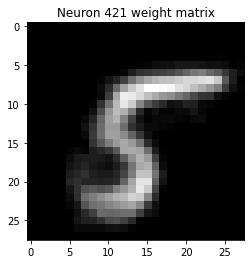

Node number: 422
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


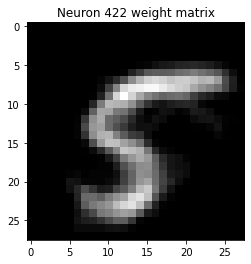

Node number: 427
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


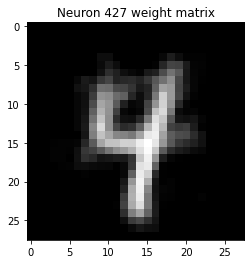

Node number: 428
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


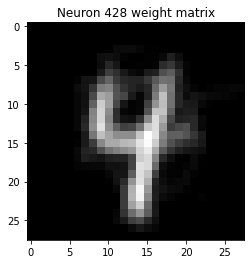

Node number: 429
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}


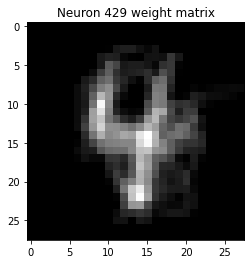

Node number: 430
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}


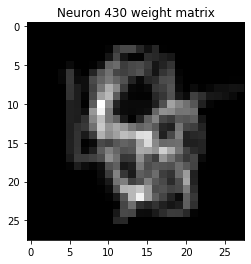

Node number: 446
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


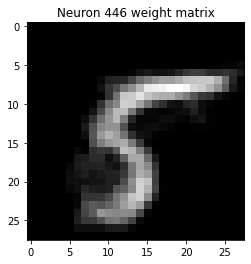

Node number: 449
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


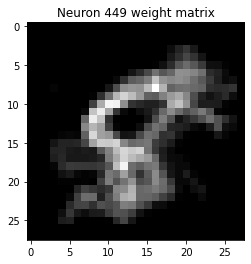

Node number: 450
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0}


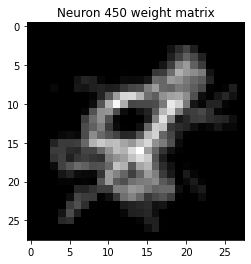

Node number: 452
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 1}


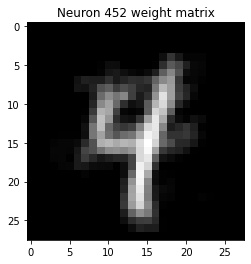

Node number: 455
Correct labels count in node: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


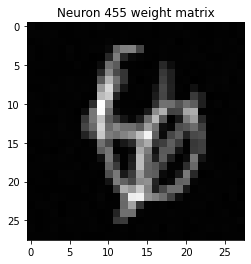

In [136]:
neighborhood = [-26, -25, -24, -1, 1, 24, 25, 26]
square_som = SOM(28*28, 625, neighborhood, max_epochs=40, learning_rate=0.15)
train_start_time = time.time()
square_som.train(x_train)
train_time = time.time() - train_start_time
print(f"Train time: {train_time} s")
square_som.test(x_test, y_test)